<h1>Um modelo de RNN-LSTM para prever resultados de partidas de futebol</h1>
<p>O objetivo deste código é apresentar um exemplo de aplicação de LSTM para um problema de previsão.</p>

<p>Foram coletados os resultados das partidas do Campeonato Brasileiro de Futebol de 2006 e 2019. O treinamento da rede terá como input parte desses jogos e deverá realizar a previsão do resultado (vitória do mandante, empate ou vitória do visitante) das partidas restantes.</p>

<p>O desempenho obtido será comparado com o de outras técnicas de previsão, como a que utilizamos no projeto Esporte em Números.</p>

<h3>Importando as Bibliotecas</h3>

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation,SpatialDropout1D,LSTM, LSTMCell
from keras.callbacks import EarlyStopping
from tqdm import tqdm

<h3>Importando os dados</h3>

In [300]:
df = pd.read_csv('Base_brasileirao3.csv',sep=';',encoding='Latin-1')
df

,Unnamed: 0,Unnamed: 0.1,ano,date,round,home_team,away_team,placar_casa,placar_visitante,resultado,...,vgmf19,vgsf19,mgm6,mgs6,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3
0,0,380,2007,13/05/2007,1,Flamengo,Palmeiras,2.0,4.0,1.0,...,0.540541,0.796296,0.315789,0.409091,0.357143,0.250000,0.523810,0.619048,0.416667,0.571429
1,1,381,2007,13/05/2007,1,Atlético-MG,Náutico,2.0,1.0,0.0,...,0.297297,0.685185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,382,2007,13/05/2007,1,Internacional,Botafogo,2.0,3.0,1.0,...,0.459459,0.444444,0.473684,0.272727,0.285714,0.333333,0.285714,0.523810,0.166667,0.571429
3,3,383,2007,13/05/2007,1,Paraná,Grêmio,3.0,0.0,0.0,...,0.648649,0.537037,0.421053,0.272727,0.357143,0.166667,0.523810,0.285714,0.416667,0.285714
4,4,384,2007,12/05/2007,1,Figueirense,Athletico-PR,3.0,6.0,1.0,...,0.756757,0.611111,0.421053,0.181818,0.071429,0.000000,0.285714,0.571429,0.166667,0.214286
5,5,385,2007,12/05/2007,1,Fluminense,Cruzeiro,2.0,2.0,0.5,...,0.378378,0.462963,0.315789,0.227273,0.142857,0.083333,0.333333,0.476190,0.083333,0.500000
6,6,386,2007,12/05/2007,1,São Paulo,Goiás,2.0,0.0,0.0,...,0.702703,0.444444,0.473684,0.045455,0.428571,0.083333,0.571429,0.285714,0.750000,0.214286
7,7,387,2007,13/05/2007,1,América-RN,Vasco,0.0,1.0,1.0,...,0.729730,0.574074,0.000000,0.000000,0.000000,0.000000,0.333333,0.238095,0.166667,0.142857
8,8,388,2007,13/05/2007,1,Corinthians,Juventude,1.0,0.0,0.0,...,0.432432,0.722222,0.473684,0.227273,0.500000,0.333333,0.476190,0.619048,0.333333,0.500000
9,9,389,2007,13/05/2007,1,Sport,Santos,4.0,1.0,0.0,...,0.621622,0.444444,0.000000,0.000000,0.000000,0.000000,0.285714,0.190476,0.166667,0.142857


In [301]:
#Informações sobre a base de dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 51 columns):
Unnamed: 0          4940 non-null int64
Unnamed: 0.1        4940 non-null int64
ano                 4940 non-null int64
date                4940 non-null object
round               4940 non-null int64
home_team           4940 non-null object
away_team           4940 non-null object
placar_casa         4939 non-null float64
placar_visitante    4939 non-null float64
resultado           4940 non-null float64
arena               3800 non-null object
mv38                4940 non-null float64
me38                4940 non-null float64
md38                4940 non-null float64
mvc19               4940 non-null float64
mec19               4940 non-null float64
mdc19               4940 non-null float64
vv38                4940 non-null float64
ve38                4940 non-null float64
vd38                4940 non-null float64
vvf19               4940 non-null float64
vef19               494

<p>A coluna 'resultado' apresenta nossa função objetivo.</p>
<p>0.0 é vitória do mandante, 0.5 é empate, 1.0 é vitória do visitante</p> 

In [302]:
df['resultado'].value_counts()

0.0    2476
0.5    1315
1.0    1149
Name: resultado, dtype: int64

In [303]:
df.iloc[:,-40:].head()

,mv38,me38,md38,mvc19,mec19,mdc19,vv38,ve38,vd38,vvf19,...,vgmf19,vgsf19,mgm6,mgs6,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3
0,0.517241,0.368421,0.571429,0.555556,0.416667,0.307692,0.428571,0.421053,0.024725,0.153846,...,0.540541,0.796296,0.315789,0.409091,0.357143,0.250000,0.523810,0.619048,0.416667,0.571429
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.297297,0.685185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.689655,0.473684,0.321429,0.555556,0.500000,0.230769,0.464286,0.631579,0.017857,0.230769,...,0.459459,0.444444,0.473684,0.272727,0.285714,0.333333,0.285714,0.523810,0.166667,0.571429
3,0.620690,0.315789,0.500000,0.666667,0.333333,0.230769,0.714286,0.368421,0.015110,0.538462,...,0.648649,0.537037,0.421053,0.272727,0.357143,0.166667,0.523810,0.285714,0.416667,0.285714
4,0.517241,0.631579,0.392857,0.500000,0.583333,0.230769,0.464286,0.473684,0.021978,0.307692,...,0.756757,0.611111,0.421053,0.181818,0.071429,0.000000,0.285714,0.571429,0.166667,0.214286


<h3>Preparando dados de Treino e Teste</h3>

In [304]:
X = df.iloc[:,-40:].values
Y = df['resultado'].values
print('X: ', X.shape)
print('Y: ', Y.shape)

#test_size:
ts = 0.2
#random_state:
rs = 100
#Separando os dados de treino e teste:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = ts,random_state = rs)

X_train2, X_test2 = [[[0]*X_train.shape[1]]*1]*X_train.shape[0], [[[0]*X_test.shape[1]]*1]*X_test.shape[0]

for i in range(X_train.shape[0]):
        for k in range(X_train.shape[1]):
            X_train2[i][0][k] = X_train[i][k]
            
for i in range(X_test.shape[0]):
        for k in range(X_test.shape[1]):
            X_test2[i][0][k] = X_test[i][k]
            
X_train2, X_test2 = np.array(X_train2),np.array(X_test2)

Xv= [[[0]*X.shape[1]]*1]*X.shape[0]

for i in range(X.shape[0]):
    for j in range(1):
        for k in range(X.shape[1]):
            Xv[i][j][k] = X[i][k]
            
Xv = np.array(Xv)

#Printando resultados:
print('X treino:', X_train2.shape)
print('X teste:', X_test2.shape)
print('Xv:', Xv.shape)


X:  (4940, 40)
Y:  (4940,)
X treino: (3952, 1, 40)
X teste: (988, 1, 40)
Xv: (4940, 1, 40)


<h3>Rodando os modelos</h3>

In [305]:
#Parâmetros da rede:
epochs = 20
batch_size = 5
patience = 5
vs=0.15
md = 0.0001
monitor = 'val_acc'
optimizer = 'adam'    

In [306]:
#Inserindo camadas:
modelLSTM = Sequential()
modelLSTM.add(LSTM(4))
modelLSTM.add(Dense(2, activation='sigmoid'))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [307]:
#Treinando a rede
historyLSTM = modelLSTM.fit(X_train2, Y_train, epochs=epochs, batch_size=batch_size,validation_split=vs,callbacks=[EarlyStopping(monitor=monitor, patience=patience, min_delta=md)])

Train on 3359 samples, validate on 593 samples
Epoch 1/20
3359/3359 [==============================] - ETA: 5:41:23 - loss: 0.6521 - acc: 0.60 - ETA: 1:53:39 - loss: 0.6598 - acc: 0.53 - ETA: 56:41 - loss: 0.6678 - acc: 0.5000 - ETA: 48:37 - loss: 0.6803 - acc: 0.45 - ETA: 37:47 - loss: 0.6733 - acc: 0.46 - ETA: 30:53 - loss: 0.6615 - acc: 0.52 - ETA: 26:06 - loss: 0.6594 - acc: 0.52 - ETA: 22:36 - loss: 0.6578 - acc: 0.53 - ETA: 21:12 - loss: 0.6588 - acc: 0.52 - ETA: 19:58 - loss: 0.6598 - acc: 0.51 - ETA: 17:50 - loss: 0.6598 - acc: 0.51 - ETA: 16:07 - loss: 0.6626 - acc: 0.51 - ETA: 14:04 - loss: 0.6666 - acc: 0.49 - ETA: 12:58 - loss: 0.6613 - acc: 0.51 - ETA: 11:36 - loss: 0.6626 - acc: 0.50 - ETA: 10:50 - loss: 0.6623 - acc: 0.49 - ETA: 10:10 - loss: 0.6650 - acc: 0.48 - ETA: 9:17 - loss: 0.6648 - acc: 0.4778 - ETA: 8:47 - loss: 0.6679 - acc: 0.468 - ETA: 8:20 - loss: 0.6665 - acc: 0.475 - ETA: 7:56 - loss: 0.6629 - acc: 0.490 - ETA: 7:34 - loss: 0.6642 - acc: 0.486 - ETA: 7:03 

3359/3359 [==============================] - ETA: 20s - loss: 0.7287 - acc: 0.40 - ETA: 19s - loss: 0.6213 - acc: 0.60 - ETA: 20s - loss: 0.6105 - acc: 0.60 - ETA: 17s - loss: 0.6416 - acc: 0.52 - ETA: 19s - loss: 0.6392 - acc: 0.53 - ETA: 19s - loss: 0.6259 - acc: 0.54 - ETA: 19s - loss: 0.6293 - acc: 0.53 - ETA: 18s - loss: 0.6171 - acc: 0.57 - ETA: 18s - loss: 0.6238 - acc: 0.55 - ETA: 18s - loss: 0.6234 - acc: 0.56 - ETA: 19s - loss: 0.6232 - acc: 0.56 - ETA: 19s - loss: 0.6204 - acc: 0.57 - ETA: 18s - loss: 0.6202 - acc: 0.57 - ETA: 18s - loss: 0.6202 - acc: 0.57 - ETA: 19s - loss: 0.6201 - acc: 0.57 - ETA: 20s - loss: 0.6281 - acc: 0.56 - ETA: 20s - loss: 0.6316 - acc: 0.55 - ETA: 21s - loss: 0.6331 - acc: 0.55 - ETA: 21s - loss: 0.6308 - acc: 0.55 - ETA: 22s - loss: 0.6287 - acc: 0.56 - ETA: 22s - loss: 0.6298 - acc: 0.56 - ETA: 22s - loss: 0.6311 - acc: 0.56 - ETA: 22s - loss: 0.6258 - acc: 0.56 - ETA: 22s - loss: 0.6327 - acc: 0.55 - ETA: 22s - loss: 0.6324 - acc: 0.55 - ETA: 

3359/3359 [==============================] - ETA: 8s - loss: 0.6762 - acc: 0.400 - ETA: 6s - loss: 0.6191 - acc: 0.600 - ETA: 6s - loss: 0.6190 - acc: 0.615 - ETA: 6s - loss: 0.6280 - acc: 0.610 - ETA: 5s - loss: 0.6470 - acc: 0.568 - ETA: 5s - loss: 0.6605 - acc: 0.535 - ETA: 5s - loss: 0.6659 - acc: 0.516 - ETA: 5s - loss: 0.6565 - acc: 0.528 - ETA: 5s - loss: 0.6547 - acc: 0.530 - ETA: 5s - loss: 0.6646 - acc: 0.507 - ETA: 5s - loss: 0.6667 - acc: 0.498 - ETA: 5s - loss: 0.6738 - acc: 0.487 - ETA: 5s - loss: 0.6731 - acc: 0.483 - ETA: 5s - loss: 0.6726 - acc: 0.487 - ETA: 5s - loss: 0.6758 - acc: 0.483 - ETA: 5s - loss: 0.6768 - acc: 0.477 - ETA: 5s - loss: 0.6762 - acc: 0.476 - ETA: 5s - loss: 0.6751 - acc: 0.472 - ETA: 5s - loss: 0.6712 - acc: 0.479 - ETA: 5s - loss: 0.6704 - acc: 0.479 - ETA: 5s - loss: 0.6741 - acc: 0.470 - ETA: 5s - loss: 0.6745 - acc: 0.468 - ETA: 5s - loss: 0.6725 - acc: 0.473 - ETA: 5s - loss: 0.6729 - acc: 0.471 - ETA: 5s - loss: 0.6694 - acc: 0.482 - ETA: 

3359/3359 [==============================] - ETA: 19s - loss: 0.5006 - acc: 0.80 - ETA: 35s - loss: 0.5888 - acc: 0.60 - ETA: 39s - loss: 0.6182 - acc: 0.60 - ETA: 44s - loss: 0.6329 - acc: 0.60 - ETA: 42s - loss: 0.6652 - acc: 0.56 - ETA: 41s - loss: 0.6965 - acc: 0.50 - ETA: 40s - loss: 0.6937 - acc: 0.51 - ETA: 36s - loss: 0.6834 - acc: 0.53 - ETA: 33s - loss: 0.6822 - acc: 0.50 - ETA: 31s - loss: 0.6725 - acc: 0.50 - ETA: 31s - loss: 0.6769 - acc: 0.50 - ETA: 30s - loss: 0.6624 - acc: 0.53 - ETA: 31s - loss: 0.6599 - acc: 0.54 - ETA: 29s - loss: 0.6465 - acc: 0.55 - ETA: 28s - loss: 0.6466 - acc: 0.56 - ETA: 27s - loss: 0.6441 - acc: 0.56 - ETA: 26s - loss: 0.6491 - acc: 0.56 - ETA: 26s - loss: 0.6490 - acc: 0.56 - ETA: 25s - loss: 0.6509 - acc: 0.55 - ETA: 24s - loss: 0.6545 - acc: 0.55 - ETA: 24s - loss: 0.6523 - acc: 0.55 - ETA: 24s - loss: 0.6496 - acc: 0.55 - ETA: 24s - loss: 0.6478 - acc: 0.55 - ETA: 23s - loss: 0.6524 - acc: 0.54 - ETA: 23s - loss: 0.6595 - acc: 0.53 - ETA: 

3359/3359 [==============================] - ETA: 6s - loss: 0.6765 - acc: 0.600 - ETA: 6s - loss: 0.7340 - acc: 0.371 - ETA: 6s - loss: 0.6817 - acc: 0.500 - ETA: 7s - loss: 0.6626 - acc: 0.525 - ETA: 6s - loss: 0.6612 - acc: 0.500 - ETA: 6s - loss: 0.6644 - acc: 0.500 - ETA: 6s - loss: 0.6598 - acc: 0.505 - ETA: 6s - loss: 0.6619 - acc: 0.502 - ETA: 6s - loss: 0.6625 - acc: 0.497 - ETA: 5s - loss: 0.6644 - acc: 0.500 - ETA: 6s - loss: 0.6632 - acc: 0.492 - ETA: 6s - loss: 0.6661 - acc: 0.488 - ETA: 6s - loss: 0.6701 - acc: 0.480 - ETA: 6s - loss: 0.6642 - acc: 0.491 - ETA: 6s - loss: 0.6665 - acc: 0.486 - ETA: 5s - loss: 0.6610 - acc: 0.496 - ETA: 5s - loss: 0.6552 - acc: 0.511 - ETA: 5s - loss: 0.6568 - acc: 0.505 - ETA: 5s - loss: 0.6581 - acc: 0.500 - ETA: 5s - loss: 0.6572 - acc: 0.502 - ETA: 5s - loss: 0.6607 - acc: 0.492 - ETA: 5s - loss: 0.6625 - acc: 0.488 - ETA: 5s - loss: 0.6589 - acc: 0.496 - ETA: 5s - loss: 0.6575 - acc: 0.497 - ETA: 5s - loss: 0.6597 - acc: 0.493 - ETA: 

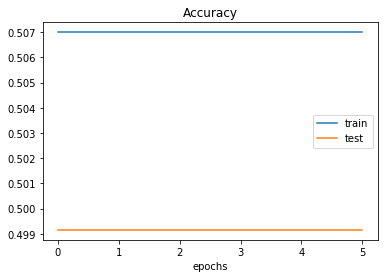

In [309]:
# Accuracy in and out sample
plt.title('Accuracy')
plt.plot(historyLSTM.history['acc'], label='train')
plt.plot(historyLSTM.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [245]:
# save model
my_model = historyLSTM.model.save('my_model2.h5')
# load model
model = load_model('my_model2.h5')
# summarize model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 4)                 720       
_________________________________________________________________
dense_66 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 3         
Total params: 733
Trainable params: 733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Parâmetros da rede:
epochs = 20
batch_size = 5
patience = 5
vs=0.15
md = 0.0001
monitor = 'val_acc'
optimizer = 'adam'

In [248]:
#Inserindo camadas:
modelLSTM = Sequential()
modelLSTM.add(LSTM(64,dropout=0.1, recurrent_dropout=0.1))
modelLSTM.add(Dense(8, activation='sigmoid'))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [249]:
#Treinando a rede
historyLSTM = modelLSTM.fit(X_train2, Y_train, epochs=epochs, batch_size=batch_size,validation_split=vs,callbacks=[EarlyStopping(monitor=monitor, patience=patience, min_delta=md)])

Train on 3359 samples, validate on 593 samples
Epoch 1/20
3359/3359 [==============================] - ETA: 7:06:47 - loss: 0.6711 - acc: 0.40 - ETA: 3:33:30 - loss: 0.6268 - acc: 0.60 - ETA: 2:22:23 - loss: 0.6120 - acc: 0.66 - ETA: 1:46:48 - loss: 0.5913 - acc: 0.70 - ETA: 1:25:29 - loss: 0.6176 - acc: 0.60 - ETA: 1:11:19 - loss: 0.6105 - acc: 0.63 - ETA: 1:01:07 - loss: 0.6263 - acc: 0.60 - ETA: 53:30 - loss: 0.6259 - acc: 0.5750 - ETA: 47:36 - loss: 0.6074 - acc: 0.62 - ETA: 42:52 - loss: 0.6360 - acc: 0.58 - ETA: 38:59 - loss: 0.6393 - acc: 0.56 - ETA: 35:45 - loss: 0.6513 - acc: 0.53 - ETA: 33:01 - loss: 0.6529 - acc: 0.53 - ETA: 30:40 - loss: 0.6507 - acc: 0.52 - ETA: 28:40 - loss: 0.6450 - acc: 0.53 - ETA: 25:15 - loss: 0.6551 - acc: 0.50 - ETA: 22:34 - loss: 0.6485 - acc: 0.51 - ETA: 20:24 - loss: 0.6302 - acc: 0.56 - ETA: 19:28 - loss: 0.6299 - acc: 0.56 - ETA: 17:49 - loss: 0.6267 - acc: 0.57 - ETA: 16:25 - loss: 0.6304 - acc: 0.55 - ETA: 15:50 - loss: 0.6299 - acc: 0.54 - E

3359/3359 [==============================] - ETA: 19s - loss: 0.7712 - acc: 0.40 - ETA: 28s - loss: 0.7680 - acc: 0.30 - ETA: 24s - loss: 0.8064 - acc: 0.30 - ETA: 27s - loss: 0.7944 - acc: 0.32 - ETA: 24s - loss: 0.7756 - acc: 0.31 - ETA: 22s - loss: 0.7560 - acc: 0.37 - ETA: 24s - loss: 0.7511 - acc: 0.38 - ETA: 21s - loss: 0.7219 - acc: 0.41 - ETA: 22s - loss: 0.7135 - acc: 0.42 - ETA: 22s - loss: 0.7164 - acc: 0.43 - ETA: 23s - loss: 0.7134 - acc: 0.43 - ETA: 24s - loss: 0.7059 - acc: 0.44 - ETA: 24s - loss: 0.7089 - acc: 0.44 - ETA: 24s - loss: 0.7009 - acc: 0.44 - ETA: 23s - loss: 0.6942 - acc: 0.46 - ETA: 22s - loss: 0.6956 - acc: 0.46 - ETA: 22s - loss: 0.6994 - acc: 0.45 - ETA: 22s - loss: 0.6972 - acc: 0.45 - ETA: 21s - loss: 0.6855 - acc: 0.48 - ETA: 21s - loss: 0.6834 - acc: 0.48 - ETA: 21s - loss: 0.6756 - acc: 0.50 - ETA: 21s - loss: 0.6702 - acc: 0.51 - ETA: 20s - loss: 0.6722 - acc: 0.50 - ETA: 20s - loss: 0.6685 - acc: 0.50 - ETA: 20s - loss: 0.6630 - acc: 0.51 - ETA: 

3359/3359 [==============================] - ETA: 9s - loss: 0.5987 - acc: 0.800 - ETA: 6s - loss: 0.6047 - acc: 0.628 - ETA: 5s - loss: 0.5947 - acc: 0.600 - ETA: 5s - loss: 0.5991 - acc: 0.589 - ETA: 5s - loss: 0.6250 - acc: 0.569 - ETA: 5s - loss: 0.6307 - acc: 0.557 - ETA: 5s - loss: 0.6208 - acc: 0.565 - ETA: 5s - loss: 0.6170 - acc: 0.569 - ETA: 5s - loss: 0.6283 - acc: 0.550 - ETA: 5s - loss: 0.6224 - acc: 0.562 - ETA: 5s - loss: 0.6258 - acc: 0.556 - ETA: 5s - loss: 0.6341 - acc: 0.542 - ETA: 4s - loss: 0.6314 - acc: 0.542 - ETA: 5s - loss: 0.6337 - acc: 0.539 - ETA: 5s - loss: 0.6337 - acc: 0.537 - ETA: 5s - loss: 0.6394 - acc: 0.524 - ETA: 5s - loss: 0.6436 - acc: 0.514 - ETA: 5s - loss: 0.6437 - acc: 0.516 - ETA: 5s - loss: 0.6425 - acc: 0.525 - ETA: 5s - loss: 0.6428 - acc: 0.521 - ETA: 5s - loss: 0.6420 - acc: 0.519 - ETA: 4s - loss: 0.6411 - acc: 0.524 - ETA: 4s - loss: 0.6405 - acc: 0.525 - ETA: 4s - loss: 0.6437 - acc: 0.513 - ETA: 4s - loss: 0.6455 - acc: 0.509 - ETA: 

3359/3359 [==============================] - ETA: 7s - loss: 0.8710 - acc: 0.0000e+0 - ETA: 6s - loss: 0.6226 - acc: 0.5429    - ETA: 5s - loss: 0.6578 - acc: 0.471 - ETA: 5s - loss: 0.6415 - acc: 0.480 - ETA: 5s - loss: 0.6409 - acc: 0.481 - ETA: 5s - loss: 0.6327 - acc: 0.497 - ETA: 5s - loss: 0.6482 - acc: 0.476 - ETA: 5s - loss: 0.6429 - acc: 0.485 - ETA: 5s - loss: 0.6402 - acc: 0.480 - ETA: 5s - loss: 0.6407 - acc: 0.480 - ETA: 5s - loss: 0.6453 - acc: 0.480 - ETA: 5s - loss: 0.6503 - acc: 0.482 - ETA: 5s - loss: 0.6493 - acc: 0.490 - ETA: 5s - loss: 0.6483 - acc: 0.495 - ETA: 5s - loss: 0.6447 - acc: 0.497 - ETA: 4s - loss: 0.6424 - acc: 0.501 - ETA: 4s - loss: 0.6464 - acc: 0.491 - ETA: 4s - loss: 0.6494 - acc: 0.485 - ETA: 4s - loss: 0.6511 - acc: 0.485 - ETA: 4s - loss: 0.6464 - acc: 0.498 - ETA: 4s - loss: 0.6437 - acc: 0.500 - ETA: 4s - loss: 0.6473 - acc: 0.497 - ETA: 4s - loss: 0.6511 - acc: 0.484 - ETA: 4s - loss: 0.6470 - acc: 0.490 - ETA: 4s - loss: 0.6466 - acc: 0.496

3359/3359 [==============================] - ETA: 8s - loss: 0.6650 - acc: 0.400 - ETA: 6s - loss: 0.7181 - acc: 0.400 - ETA: 6s - loss: 0.7012 - acc: 0.384 - ETA: 5s - loss: 0.6994 - acc: 0.389 - ETA: 6s - loss: 0.6907 - acc: 0.416 - ETA: 6s - loss: 0.6852 - acc: 0.438 - ETA: 6s - loss: 0.6769 - acc: 0.464 - ETA: 6s - loss: 0.6797 - acc: 0.455 - ETA: 6s - loss: 0.6657 - acc: 0.481 - ETA: 6s - loss: 0.6658 - acc: 0.478 - ETA: 7s - loss: 0.6699 - acc: 0.465 - ETA: 6s - loss: 0.6654 - acc: 0.470 - ETA: 6s - loss: 0.6583 - acc: 0.478 - ETA: 6s - loss: 0.6537 - acc: 0.482 - ETA: 6s - loss: 0.6517 - acc: 0.483 - ETA: 5s - loss: 0.6505 - acc: 0.484 - ETA: 5s - loss: 0.6495 - acc: 0.480 - ETA: 5s - loss: 0.6474 - acc: 0.485 - ETA: 5s - loss: 0.6480 - acc: 0.486 - ETA: 5s - loss: 0.6487 - acc: 0.489 - ETA: 5s - loss: 0.6432 - acc: 0.500 - ETA: 4s - loss: 0.6379 - acc: 0.511 - ETA: 4s - loss: 0.6355 - acc: 0.511 - ETA: 4s - loss: 0.6429 - acc: 0.505 - ETA: 4s - loss: 0.6423 - acc: 0.504 - ETA: 

3359/3359 [==============================] - ETA: 9s - loss: 0.5587 - acc: 0.600 - ETA: 6s - loss: 0.6634 - acc: 0.428 - ETA: 6s - loss: 0.6497 - acc: 0.450 - ETA: 6s - loss: 0.6427 - acc: 0.470 - ETA: 6s - loss: 0.6327 - acc: 0.509 - ETA: 6s - loss: 0.6301 - acc: 0.507 - ETA: 6s - loss: 0.6276 - acc: 0.517 - ETA: 6s - loss: 0.6241 - acc: 0.523 - ETA: 6s - loss: 0.6230 - acc: 0.521 - ETA: 5s - loss: 0.6262 - acc: 0.523 - ETA: 5s - loss: 0.6351 - acc: 0.515 - ETA: 5s - loss: 0.6274 - acc: 0.532 - ETA: 5s - loss: 0.6324 - acc: 0.519 - ETA: 5s - loss: 0.6289 - acc: 0.520 - ETA: 5s - loss: 0.6295 - acc: 0.520 - ETA: 5s - loss: 0.6302 - acc: 0.520 - ETA: 5s - loss: 0.6290 - acc: 0.522 - ETA: 5s - loss: 0.6290 - acc: 0.525 - ETA: 5s - loss: 0.6313 - acc: 0.520 - ETA: 5s - loss: 0.6290 - acc: 0.524 - ETA: 5s - loss: 0.6298 - acc: 0.522 - ETA: 5s - loss: 0.6343 - acc: 0.516 - ETA: 5s - loss: 0.6343 - acc: 0.516 - ETA: 5s - loss: 0.6327 - acc: 0.517 - ETA: 5s - loss: 0.6330 - acc: 0.514 - ETA: 

3359/3359 [==============================] - ETA: 8s - loss: 0.5390 - acc: 0.600 - ETA: 10s - loss: 0.7050 - acc: 0.40 - ETA: 12s - loss: 0.6935 - acc: 0.34 - ETA: 12s - loss: 0.6451 - acc: 0.46 - ETA: 12s - loss: 0.6274 - acc: 0.52 - ETA: 11s - loss: 0.6122 - acc: 0.55 - ETA: 11s - loss: 0.6294 - acc: 0.54 - ETA: 11s - loss: 0.6323 - acc: 0.52 - ETA: 11s - loss: 0.6328 - acc: 0.51 - ETA: 11s - loss: 0.6336 - acc: 0.50 - ETA: 11s - loss: 0.6309 - acc: 0.50 - ETA: 11s - loss: 0.6442 - acc: 0.48 - ETA: 12s - loss: 0.6427 - acc: 0.48 - ETA: 12s - loss: 0.6474 - acc: 0.48 - ETA: 11s - loss: 0.6421 - acc: 0.50 - ETA: 11s - loss: 0.6435 - acc: 0.49 - ETA: 11s - loss: 0.6401 - acc: 0.50 - ETA: 11s - loss: 0.6383 - acc: 0.50 - ETA: 11s - loss: 0.6343 - acc: 0.51 - ETA: 11s - loss: 0.6320 - acc: 0.51 - ETA: 10s - loss: 0.6316 - acc: 0.51 - ETA: 10s - loss: 0.6290 - acc: 0.51 - ETA: 10s - loss: 0.6239 - acc: 0.53 - ETA: 10s - loss: 0.6260 - acc: 0.52 - ETA: 10s - loss: 0.6264 - acc: 0.52 - ETA: 

3359/3359 [==============================] - ETA: 26s - loss: 0.6129 - acc: 0.60 - ETA: 23s - loss: 0.7145 - acc: 0.46 - ETA: 22s - loss: 0.7427 - acc: 0.36 - ETA: 24s - loss: 0.7328 - acc: 0.40 - ETA: 26s - loss: 0.7256 - acc: 0.42 - ETA: 25s - loss: 0.7108 - acc: 0.46 - ETA: 24s - loss: 0.6974 - acc: 0.47 - ETA: 26s - loss: 0.6960 - acc: 0.48 - ETA: 26s - loss: 0.6815 - acc: 0.50 - ETA: 25s - loss: 0.6772 - acc: 0.50 - ETA: 26s - loss: 0.6736 - acc: 0.50 - ETA: 25s - loss: 0.6715 - acc: 0.50 - ETA: 25s - loss: 0.6859 - acc: 0.48 - ETA: 24s - loss: 0.6871 - acc: 0.47 - ETA: 23s - loss: 0.6814 - acc: 0.48 - ETA: 23s - loss: 0.6772 - acc: 0.48 - ETA: 23s - loss: 0.6748 - acc: 0.48 - ETA: 23s - loss: 0.6759 - acc: 0.48 - ETA: 23s - loss: 0.6727 - acc: 0.48 - ETA: 24s - loss: 0.6752 - acc: 0.47 - ETA: 23s - loss: 0.6714 - acc: 0.46 - ETA: 24s - loss: 0.6723 - acc: 0.47 - ETA: 24s - loss: 0.6698 - acc: 0.47 - ETA: 24s - loss: 0.6687 - acc: 0.48 - ETA: 24s - loss: 0.6649 - acc: 0.48 - ETA: 

3359/3359 [==============================] - ETA: 10s - loss: 0.5392 - acc: 0.60 - ETA: 7s - loss: 0.6177 - acc: 0.5429 - ETA: 6s - loss: 0.6247 - acc: 0.523 - ETA: 6s - loss: 0.6324 - acc: 0.505 - ETA: 5s - loss: 0.6411 - acc: 0.496 - ETA: 5s - loss: 0.6542 - acc: 0.477 - ETA: 5s - loss: 0.6488 - acc: 0.494 - ETA: 6s - loss: 0.6451 - acc: 0.505 - ETA: 6s - loss: 0.6447 - acc: 0.511 - ETA: 6s - loss: 0.6417 - acc: 0.513 - ETA: 5s - loss: 0.6360 - acc: 0.519 - ETA: 5s - loss: 0.6339 - acc: 0.519 - ETA: 5s - loss: 0.6336 - acc: 0.525 - ETA: 5s - loss: 0.6362 - acc: 0.528 - ETA: 5s - loss: 0.6340 - acc: 0.533 - ETA: 5s - loss: 0.6339 - acc: 0.531 - ETA: 5s - loss: 0.6370 - acc: 0.528 - ETA: 5s - loss: 0.6349 - acc: 0.531 - ETA: 5s - loss: 0.6349 - acc: 0.532 - ETA: 5s - loss: 0.6352 - acc: 0.529 - ETA: 5s - loss: 0.6355 - acc: 0.530 - ETA: 5s - loss: 0.6378 - acc: 0.522 - ETA: 5s - loss: 0.6328 - acc: 0.529 - ETA: 5s - loss: 0.6301 - acc: 0.533 - ETA: 5s - loss: 0.6310 - acc: 0.535 - ETA:

3359/3359 [==============================] - ETA: 8s - loss: 0.5822 - acc: 0.600 - ETA: 16s - loss: 0.5816 - acc: 0.60 - ETA: 24s - loss: 0.5801 - acc: 0.60 - ETA: 27s - loss: 0.6028 - acc: 0.52 - ETA: 30s - loss: 0.5988 - acc: 0.53 - ETA: 31s - loss: 0.6110 - acc: 0.54 - ETA: 32s - loss: 0.6063 - acc: 0.55 - ETA: 35s - loss: 0.6082 - acc: 0.53 - ETA: 36s - loss: 0.6151 - acc: 0.52 - ETA: 38s - loss: 0.6132 - acc: 0.50 - ETA: 39s - loss: 0.6065 - acc: 0.51 - ETA: 40s - loss: 0.6065 - acc: 0.52 - ETA: 41s - loss: 0.6087 - acc: 0.52 - ETA: 42s - loss: 0.6017 - acc: 0.54 - ETA: 42s - loss: 0.6153 - acc: 0.52 - ETA: 39s - loss: 0.6127 - acc: 0.52 - ETA: 39s - loss: 0.6082 - acc: 0.52 - ETA: 37s - loss: 0.6260 - acc: 0.50 - ETA: 36s - loss: 0.6282 - acc: 0.50 - ETA: 34s - loss: 0.6308 - acc: 0.49 - ETA: 34s - loss: 0.6400 - acc: 0.47 - ETA: 34s - loss: 0.6381 - acc: 0.48 - ETA: 33s - loss: 0.6359 - acc: 0.48 - ETA: 32s - loss: 0.6474 - acc: 0.47 - ETA: 32s - loss: 0.6455 - acc: 0.48 - ETA: 

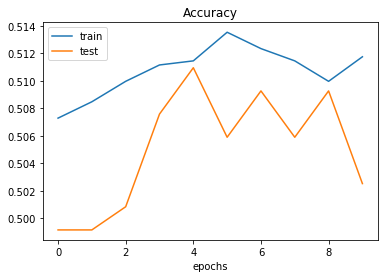

In [250]:
# Accuracy in and out sample
plt.title('Accuracy')
plt.plot(historyLSTM.history['acc'], label='train')
plt.plot(historyLSTM.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [252]:
# save_model
my_model = historyLSTM.model.save('my_model3.h5')
# load model
model = load_model('my_model3.h5')
# summarize model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 64)                26880     
_________________________________________________________________
dense_68 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 9         
Total params: 27,409
Trainable params: 27,409
Non-trainable params: 0
_________________________________________________________________


Agora vamos mudar a base, agregando o resultado de empate ao resultado de vitória do visitante.

In [542]:
df = pd.read_csv('Base_brasileirao3.csv',sep=';',encoding='Latin-1')
df

,Unnamed: 0,Unnamed: 0.1,ano,date,round,home_team,away_team,placar_casa,placar_visitante,resultado,...,vgmf19,vgsf19,mgm6,mgs6,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3
0,0,380,2007,13/05/2007,1,Flamengo,Palmeiras,2.0,4.0,1.0,...,0.540541,0.796296,0.315789,0.409091,0.357143,0.250000,0.523810,0.619048,0.416667,0.571429
1,1,381,2007,13/05/2007,1,Atlético-MG,Náutico,2.0,1.0,0.0,...,0.297297,0.685185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,382,2007,13/05/2007,1,Internacional,Botafogo,2.0,3.0,1.0,...,0.459459,0.444444,0.473684,0.272727,0.285714,0.333333,0.285714,0.523810,0.166667,0.571429
3,3,383,2007,13/05/2007,1,Paraná,Grêmio,3.0,0.0,0.0,...,0.648649,0.537037,0.421053,0.272727,0.357143,0.166667,0.523810,0.285714,0.416667,0.285714
4,4,384,2007,12/05/2007,1,Figueirense,Athletico-PR,3.0,6.0,1.0,...,0.756757,0.611111,0.421053,0.181818,0.071429,0.000000,0.285714,0.571429,0.166667,0.214286
5,5,385,2007,12/05/2007,1,Fluminense,Cruzeiro,2.0,2.0,0.5,...,0.378378,0.462963,0.315789,0.227273,0.142857,0.083333,0.333333,0.476190,0.083333,0.500000
6,6,386,2007,12/05/2007,1,São Paulo,Goiás,2.0,0.0,0.0,...,0.702703,0.444444,0.473684,0.045455,0.428571,0.083333,0.571429,0.285714,0.750000,0.214286
7,7,387,2007,13/05/2007,1,América-RN,Vasco,0.0,1.0,1.0,...,0.729730,0.574074,0.000000,0.000000,0.000000,0.000000,0.333333,0.238095,0.166667,0.142857
8,8,388,2007,13/05/2007,1,Corinthians,Juventude,1.0,0.0,0.0,...,0.432432,0.722222,0.473684,0.227273,0.500000,0.333333,0.476190,0.619048,0.333333,0.500000
9,9,389,2007,13/05/2007,1,Sport,Santos,4.0,1.0,0.0,...,0.621622,0.444444,0.000000,0.000000,0.000000,0.000000,0.285714,0.190476,0.166667,0.142857


In [543]:
resultado = list(df['resultado'])
resultado01 = list(df['resultado'])

In [544]:
for i in range(len(resultado)):
    if resultado01[i]==0.5:
        resultado01[i]=1

In [545]:
df['resultado'] = resultado01
df['resultado'].value_counts()

0.0    2476
1.0    2464
Name: resultado, dtype: int64

In [610]:
X = df.iloc[:,-40:].values
Y = df['resultado'].values

#test_size:
ts = 0.2
#random_state:
rs = 100
#Separando os dados de treino e teste:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = ts,random_state = rs)
X_train2, X_test2, Xv = [[[0]*X_train.shape[1]]*1]*X_train.shape[0], [[[0]*X_test.shape[1]]*1]*X_test.shape[0],[[[0]*X.shape[1]]*1]*X.shape[0]
X_train2, X_test2, Xv = np.array(X_train2),np.array(X_test2),np.array(Xv)

In [611]:
for i in range(X_train.shape[0]):
        for k in range(X_train.shape[1]):
            X_train2[i][0][k] = X_train[i][k]
            
for i in range(X_test.shape[0]):
        for k in range(X_test.shape[1]):
            X_test2[i][0][k] = X_test[i][k]

for i in range(X.shape[0]):
    for j in range(1):
        for k in range(X.shape[1]):
            Xv[i][j][k] = X[i][k]
            
X_train2, X_test2, Xv = np.array(X_train2),np.array(X_test2),np.array(Xv)

#Printando resultados:
print('X: ', X.shape)
print('Y: ', Y.shape)
print('X treino:', X_train2.shape)
print('X teste:', X_test2.shape)
print('Xv:', Xv.shape)

X:  (4940, 40)
Y:  (4940,)
X treino: (3952, 1, 40)
X teste: (988, 1, 40)
Xv: (4940, 1, 40)


In [603]:
#Parâmetros da rede:
epochs = 20
batch_size = 5
patience = 5
vs=0.15
md = 0.0001
monitor = 'val_acc'
optimizer = 'adam'

In [604]:
#Inserindo camadas:
modelLSTM = Sequential()
modelLSTM.add(LSTM(4))
modelLSTM.add(Dense(2, activation='sigmoid'))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [605]:
#Treinando a rede
historyLSTM = modelLSTM.fit(X_train2, Y_train, epochs=epochs, batch_size=batch_size,validation_split=vs,callbacks=[EarlyStopping(monitor=monitor, patience=patience, min_delta=md)])

Train on 3359 samples, validate on 593 samples
Epoch 1/20


2600/3359 [======================>.......] - ETA: 11:43:20 - loss: 0.6731 - acc: 0.600 - ETA: 5:51:29 - loss: 0.6360 - acc: 0.700 - ETA: 3:54:11 - loss: 0.6227 - acc: 0.73 - ETA: 2:55:39 - loss: 0.6354 - acc: 0.70 - ETA: 2:20:25 - loss: 0.6426 - acc: 0.68 - ETA: 1:56:56 - loss: 0.6609 - acc: 0.63 - ETA: 1:40:13 - loss: 0.6849 - acc: 0.57 - ETA: 1:27:41 - loss: 0.6738 - acc: 0.60 - ETA: 1:17:57 - loss: 0.6649 - acc: 0.62 - ETA: 1:10:09 - loss: 0.6577 - acc: 0.64 - ETA: 1:03:47 - loss: 0.6660 - acc: 0.61 - ETA: 58:27 - loss: 0.6663 - acc: 0.6167 - ETA: 53:56 - loss: 0.6729 - acc: 0.60 - ETA: 50:03 - loss: 0.6729 - acc: 0.60 - ETA: 43:42 - loss: 0.6827 - acc: 0.57 - ETA: 41:06 - loss: 0.6821 - acc: 0.57 - ETA: 38:48 - loss: 0.6860 - acc: 0.56 - ETA: 36:44 - loss: 0.6812 - acc: 0.57 - ETA: 33:10 - loss: 0.6768 - acc: 0.59 - ETA: 30:14 - loss: 0.6765 - acc: 0.59 - ETA: 27:45 - loss: 0.6790 - acc: 0.58 - ETA: 26:40 - loss: 0.6788 - acc: 0.58 - ETA: 25:40 - loss: 0.6844 - acc: 0.57 - ETA: 24:

3359/3359 [==============================] - ETA: 21s - loss: 0.7002 - acc: 0.49 - ETA: 20s - loss: 0.7002 - acc: 0.49 - ETA: 20s - loss: 0.7001 - acc: 0.49 - ETA: 19s - loss: 0.7001 - acc: 0.49 - ETA: 19s - loss: 0.7002 - acc: 0.49 - ETA: 18s - loss: 0.7002 - acc: 0.49 - ETA: 18s - loss: 0.7001 - acc: 0.49 - ETA: 17s - loss: 0.7001 - acc: 0.49 - ETA: 17s - loss: 0.7000 - acc: 0.49 - ETA: 16s - loss: 0.7000 - acc: 0.49 - ETA: 15s - loss: 0.7000 - acc: 0.49 - ETA: 14s - loss: 0.7000 - acc: 0.49 - ETA: 14s - loss: 0.7000 - acc: 0.49 - ETA: 13s - loss: 0.7000 - acc: 0.49 - ETA: 13s - loss: 0.7000 - acc: 0.48 - ETA: 12s - loss: 0.6999 - acc: 0.48 - ETA: 12s - loss: 0.6999 - acc: 0.48 - ETA: 12s - loss: 0.6999 - acc: 0.48 - ETA: 11s - loss: 0.6999 - acc: 0.48 - ETA: 11s - loss: 0.6998 - acc: 0.48 - ETA: 10s - loss: 0.6998 - acc: 0.48 - ETA: 10s - loss: 0.6997 - acc: 0.48 - ETA: 9s - loss: 0.6997 - acc: 0.4896 - ETA: 9s - loss: 0.6996 - acc: 0.490 - ETA: 8s - loss: 0.6996 - acc: 0.490 - ETA:

2635/3359 [======================>.......] - ETA: 19s - loss: 0.7042 - acc: 0.20 - ETA: 39s - loss: 0.7049 - acc: 0.20 - ETA: 43s - loss: 0.7024 - acc: 0.26 - ETA: 45s - loss: 0.6971 - acc: 0.40 - ETA: 44s - loss: 0.6964 - acc: 0.44 - ETA: 43s - loss: 0.6952 - acc: 0.46 - ETA: 43s - loss: 0.6944 - acc: 0.48 - ETA: 42s - loss: 0.6947 - acc: 0.47 - ETA: 41s - loss: 0.6939 - acc: 0.48 - ETA: 37s - loss: 0.6959 - acc: 0.43 - ETA: 38s - loss: 0.6951 - acc: 0.45 - ETA: 35s - loss: 0.6949 - acc: 0.45 - ETA: 36s - loss: 0.6947 - acc: 0.46 - ETA: 36s - loss: 0.6943 - acc: 0.47 - ETA: 36s - loss: 0.6937 - acc: 0.49 - ETA: 36s - loss: 0.6931 - acc: 0.51 - ETA: 34s - loss: 0.6928 - acc: 0.52 - ETA: 35s - loss: 0.6928 - acc: 0.51 - ETA: 35s - loss: 0.6928 - acc: 0.51 - ETA: 34s - loss: 0.6928 - acc: 0.50 - ETA: 35s - loss: 0.6925 - acc: 0.51 - ETA: 35s - loss: 0.6922 - acc: 0.51 - ETA: 35s - loss: 0.6924 - acc: 0.51 - ETA: 35s - loss: 0.6923 - acc: 0.51 - ETA: 36s - loss: 0.6921 - acc: 0.51 - ETA: 

3359/3359 [==============================] - ETA: 3s - loss: 0.6933 - acc: 0.504 - ETA: 3s - loss: 0.6933 - acc: 0.504 - ETA: 3s - loss: 0.6933 - acc: 0.503 - ETA: 3s - loss: 0.6933 - acc: 0.503 - ETA: 3s - loss: 0.6933 - acc: 0.502 - ETA: 3s - loss: 0.6933 - acc: 0.502 - ETA: 2s - loss: 0.6933 - acc: 0.501 - ETA: 2s - loss: 0.6933 - acc: 0.501 - ETA: 2s - loss: 0.6933 - acc: 0.502 - ETA: 2s - loss: 0.6933 - acc: 0.502 - ETA: 2s - loss: 0.6933 - acc: 0.503 - ETA: 2s - loss: 0.6933 - acc: 0.503 - ETA: 2s - loss: 0.6933 - acc: 0.503 - ETA: 2s - loss: 0.6933 - acc: 0.503 - ETA: 2s - loss: 0.6933 - acc: 0.503 - ETA: 1s - loss: 0.6933 - acc: 0.503 - ETA: 1s - loss: 0.6933 - acc: 0.502 - ETA: 1s - loss: 0.6933 - acc: 0.503 - ETA: 1s - loss: 0.6933 - acc: 0.504 - ETA: 1s - loss: 0.6933 - acc: 0.503 - ETA: 1s - loss: 0.6933 - acc: 0.504 - ETA: 1s - loss: 0.6933 - acc: 0.502 - ETA: 1s - loss: 0.6933 - acc: 0.502 - ETA: 1s - loss: 0.6933 - acc: 0.503 - ETA: 0s - loss: 0.6933 - acc: 0.503 - ETA: 

2705/3359 [=======================>......] - ETA: 32s - loss: 0.6929 - acc: 0.60 - ETA: 39s - loss: 0.6927 - acc: 0.50 - ETA: 42s - loss: 0.6930 - acc: 0.46 - ETA: 49s - loss: 0.6928 - acc: 0.50 - ETA: 50s - loss: 0.6935 - acc: 0.52 - ETA: 51s - loss: 0.6951 - acc: 0.50 - ETA: 52s - loss: 0.6964 - acc: 0.45 - ETA: 50s - loss: 0.6955 - acc: 0.50 - ETA: 49s - loss: 0.6958 - acc: 0.46 - ETA: 47s - loss: 0.6957 - acc: 0.46 - ETA: 47s - loss: 0.6952 - acc: 0.45 - ETA: 43s - loss: 0.6951 - acc: 0.47 - ETA: 42s - loss: 0.6948 - acc: 0.48 - ETA: 39s - loss: 0.6943 - acc: 0.50 - ETA: 37s - loss: 0.6937 - acc: 0.48 - ETA: 37s - loss: 0.6935 - acc: 0.49 - ETA: 35s - loss: 0.6933 - acc: 0.50 - ETA: 36s - loss: 0.6931 - acc: 0.51 - ETA: 36s - loss: 0.6929 - acc: 0.52 - ETA: 34s - loss: 0.6926 - acc: 0.52 - ETA: 35s - loss: 0.6924 - acc: 0.52 - ETA: 34s - loss: 0.6923 - acc: 0.52 - ETA: 34s - loss: 0.6921 - acc: 0.53 - ETA: 34s - loss: 0.6923 - acc: 0.53 - ETA: 34s - loss: 0.6923 - acc: 0.52 - ETA: 

3359/3359 [==============================] - ETA: 2s - loss: 0.6925 - acc: 0.516 - ETA: 2s - loss: 0.6924 - acc: 0.517 - ETA: 2s - loss: 0.6924 - acc: 0.518 - ETA: 2s - loss: 0.6924 - acc: 0.517 - ETA: 2s - loss: 0.6925 - acc: 0.517 - ETA: 2s - loss: 0.6925 - acc: 0.517 - ETA: 2s - loss: 0.6924 - acc: 0.518 - ETA: 2s - loss: 0.6924 - acc: 0.517 - ETA: 2s - loss: 0.6925 - acc: 0.516 - ETA: 2s - loss: 0.6926 - acc: 0.516 - ETA: 1s - loss: 0.6926 - acc: 0.515 - ETA: 1s - loss: 0.6926 - acc: 0.515 - ETA: 1s - loss: 0.6925 - acc: 0.516 - ETA: 1s - loss: 0.6925 - acc: 0.516 - ETA: 1s - loss: 0.6925 - acc: 0.516 - ETA: 1s - loss: 0.6925 - acc: 0.517 - ETA: 1s - loss: 0.6925 - acc: 0.516 - ETA: 1s - loss: 0.6925 - acc: 0.515 - ETA: 1s - loss: 0.6926 - acc: 0.514 - ETA: 1s - loss: 0.6926 - acc: 0.515 - ETA: 1s - loss: 0.6926 - acc: 0.514 - ETA: 0s - loss: 0.6927 - acc: 0.513 - ETA: 0s - loss: 0.6927 - acc: 0.512 - ETA: 0s - loss: 0.6927 - acc: 0.511 - ETA: 0s - loss: 0.6927 - acc: 0.511 - ETA: 

3030/3359 [==========================>...] - ETA: 22s - loss: 0.6912 - acc: 0.60 - ETA: 31s - loss: 0.6929 - acc: 0.60 - ETA: 34s - loss: 0.6935 - acc: 0.53 - ETA: 39s - loss: 0.6948 - acc: 0.45 - ETA: 42s - loss: 0.6957 - acc: 0.40 - ETA: 43s - loss: 0.6954 - acc: 0.40 - ETA: 44s - loss: 0.6958 - acc: 0.37 - ETA: 44s - loss: 0.6957 - acc: 0.37 - ETA: 44s - loss: 0.6960 - acc: 0.35 - ETA: 40s - loss: 0.6946 - acc: 0.43 - ETA: 40s - loss: 0.6946 - acc: 0.43 - ETA: 40s - loss: 0.6947 - acc: 0.43 - ETA: 40s - loss: 0.6944 - acc: 0.44 - ETA: 40s - loss: 0.6942 - acc: 0.45 - ETA: 40s - loss: 0.6945 - acc: 0.43 - ETA: 40s - loss: 0.6948 - acc: 0.42 - ETA: 40s - loss: 0.6943 - acc: 0.44 - ETA: 41s - loss: 0.6943 - acc: 0.44 - ETA: 41s - loss: 0.6941 - acc: 0.46 - ETA: 41s - loss: 0.6943 - acc: 0.44 - ETA: 40s - loss: 0.6940 - acc: 0.46 - ETA: 41s - loss: 0.6940 - acc: 0.46 - ETA: 41s - loss: 0.6939 - acc: 0.47 - ETA: 41s - loss: 0.6941 - acc: 0.46 - ETA: 41s - loss: 0.6938 - acc: 0.47 - ETA: 

3359/3359 [==============================] - ETA: 1s - loss: 0.6927 - acc: 0.498 - ETA: 1s - loss: 0.6927 - acc: 0.499 - ETA: 1s - loss: 0.6927 - acc: 0.499 - ETA: 1s - loss: 0.6927 - acc: 0.498 - ETA: 1s - loss: 0.6927 - acc: 0.499 - ETA: 1s - loss: 0.6927 - acc: 0.498 - ETA: 0s - loss: 0.6927 - acc: 0.498 - ETA: 0s - loss: 0.6927 - acc: 0.499 - ETA: 0s - loss: 0.6927 - acc: 0.499 - ETA: 0s - loss: 0.6927 - acc: 0.499 - ETA: 0s - loss: 0.6926 - acc: 0.500 - ETA: 0s - loss: 0.6927 - acc: 0.500 - ETA: 0s - loss: 0.6926 - acc: 0.501 - ETA: 0s - loss: 0.6926 - acc: 0.501 - ETA: 0s - loss: 0.6926 - acc: 0.501 - ETA: 0s - loss: 0.6926 - acc: 0.502 - ETA: 0s - loss: 0.6926 - acc: 0.501 - 14s 4ms/step - loss: 0.6926 - acc: 0.5028 - val_loss: 0.6930 - val_acc: 0.5059
Epoch 5/20


2760/3359 [=======================>......] - ETA: 40s - loss: 0.6908 - acc: 0.40 - ETA: 1:02 - loss: 0.6909 - acc: 0.400 - ETA: 1:03 - loss: 0.6980 - acc: 0.333 - ETA: 1:03 - loss: 0.6939 - acc: 0.450 - ETA: 1:00 - loss: 0.6954 - acc: 0.400 - ETA: 1:02 - loss: 0.6937 - acc: 0.466 - ETA: 59s - loss: 0.6933 - acc: 0.457 - ETA: 57s - loss: 0.6936 - acc: 0.47 - ETA: 57s - loss: 0.6932 - acc: 0.51 - ETA: 55s - loss: 0.6943 - acc: 0.50 - ETA: 56s - loss: 0.6945 - acc: 0.49 - ETA: 57s - loss: 0.6942 - acc: 0.50 - ETA: 57s - loss: 0.6948 - acc: 0.49 - ETA: 56s - loss: 0.6941 - acc: 0.50 - ETA: 55s - loss: 0.6939 - acc: 0.50 - ETA: 54s - loss: 0.6920 - acc: 0.53 - ETA: 54s - loss: 0.6920 - acc: 0.52 - ETA: 53s - loss: 0.6910 - acc: 0.55 - ETA: 54s - loss: 0.6920 - acc: 0.53 - ETA: 53s - loss: 0.6924 - acc: 0.53 - ETA: 53s - loss: 0.6930 - acc: 0.52 - ETA: 53s - loss: 0.6926 - acc: 0.52 - ETA: 52s - loss: 0.6917 - acc: 0.53 - ETA: 52s - loss: 0.6916 - acc: 0.54 - ETA: 50s - loss: 0.6913 - acc: 0

3359/3359 [==============================] - ETA: 2s - loss: 0.6927 - acc: 0.515 - ETA: 2s - loss: 0.6927 - acc: 0.513 - ETA: 2s - loss: 0.6927 - acc: 0.513 - ETA: 2s - loss: 0.6927 - acc: 0.512 - ETA: 2s - loss: 0.6927 - acc: 0.512 - ETA: 2s - loss: 0.6927 - acc: 0.513 - ETA: 1s - loss: 0.6926 - acc: 0.513 - ETA: 1s - loss: 0.6926 - acc: 0.513 - ETA: 1s - loss: 0.6926 - acc: 0.513 - ETA: 1s - loss: 0.6926 - acc: 0.513 - ETA: 1s - loss: 0.6926 - acc: 0.514 - ETA: 1s - loss: 0.6925 - acc: 0.515 - ETA: 1s - loss: 0.6925 - acc: 0.516 - ETA: 0s - loss: 0.6925 - acc: 0.517 - ETA: 0s - loss: 0.6924 - acc: 0.518 - ETA: 0s - loss: 0.6925 - acc: 0.516 - ETA: 0s - loss: 0.6925 - acc: 0.517 - ETA: 0s - loss: 0.6925 - acc: 0.517 - ETA: 0s - loss: 0.6924 - acc: 0.517 - ETA: 0s - loss: 0.6924 - acc: 0.517 - ETA: 0s - loss: 0.6924 - acc: 0.518 - ETA: 0s - loss: 0.6923 - acc: 0.518 - ETA: 0s - loss: 0.6924 - acc: 0.517 - ETA: 0s - loss: 0.6924 - acc: 0.517 - 15s 4ms/step - loss: 0.6923 - acc: 0.5174 -

2635/3359 [======================>.......] - ETA: 36s - loss: 0.6769 - acc: 0.60 - ETA: 43s - loss: 0.6776 - acc: 0.70 - ETA: 40s - loss: 0.6819 - acc: 0.66 - ETA: 39s - loss: 0.6875 - acc: 0.55 - ETA: 39s - loss: 0.6903 - acc: 0.48 - ETA: 39s - loss: 0.6895 - acc: 0.53 - ETA: 43s - loss: 0.6918 - acc: 0.54 - ETA: 45s - loss: 0.6914 - acc: 0.52 - ETA: 45s - loss: 0.6919 - acc: 0.51 - ETA: 45s - loss: 0.6905 - acc: 0.54 - ETA: 47s - loss: 0.6931 - acc: 0.49 - ETA: 47s - loss: 0.6937 - acc: 0.46 - ETA: 47s - loss: 0.6926 - acc: 0.49 - ETA: 48s - loss: 0.6918 - acc: 0.48 - ETA: 48s - loss: 0.6920 - acc: 0.48 - ETA: 45s - loss: 0.6922 - acc: 0.48 - ETA: 45s - loss: 0.6919 - acc: 0.50 - ETA: 45s - loss: 0.6921 - acc: 0.49 - ETA: 45s - loss: 0.6926 - acc: 0.48 - ETA: 45s - loss: 0.6925 - acc: 0.48 - ETA: 44s - loss: 0.6921 - acc: 0.49 - ETA: 44s - loss: 0.6925 - acc: 0.48 - ETA: 44s - loss: 0.6918 - acc: 0.50 - ETA: 44s - loss: 0.6923 - acc: 0.49 - ETA: 43s - loss: 0.6921 - acc: 0.49 - ETA: 

3359/3359 [==============================] - ETA: 3s - loss: 0.6919 - acc: 0.520 - ETA: 3s - loss: 0.6920 - acc: 0.520 - ETA: 3s - loss: 0.6919 - acc: 0.520 - ETA: 2s - loss: 0.6919 - acc: 0.520 - ETA: 2s - loss: 0.6919 - acc: 0.520 - ETA: 2s - loss: 0.6919 - acc: 0.521 - ETA: 2s - loss: 0.6919 - acc: 0.521 - ETA: 2s - loss: 0.6919 - acc: 0.521 - ETA: 2s - loss: 0.6918 - acc: 0.523 - ETA: 2s - loss: 0.6918 - acc: 0.524 - ETA: 2s - loss: 0.6918 - acc: 0.523 - ETA: 2s - loss: 0.6918 - acc: 0.523 - ETA: 2s - loss: 0.6918 - acc: 0.523 - ETA: 2s - loss: 0.6919 - acc: 0.522 - ETA: 1s - loss: 0.6918 - acc: 0.523 - ETA: 1s - loss: 0.6918 - acc: 0.522 - ETA: 1s - loss: 0.6919 - acc: 0.522 - ETA: 1s - loss: 0.6918 - acc: 0.522 - ETA: 1s - loss: 0.6919 - acc: 0.522 - ETA: 1s - loss: 0.6920 - acc: 0.521 - ETA: 1s - loss: 0.6919 - acc: 0.521 - ETA: 1s - loss: 0.6918 - acc: 0.522 - ETA: 1s - loss: 0.6918 - acc: 0.521 - ETA: 0s - loss: 0.6918 - acc: 0.521 - ETA: 0s - loss: 0.6918 - acc: 0.521 - ETA: 

2980/3359 [=========================>....] - ETA: 38s - loss: 0.6984 - acc: 0.40 - ETA: 44s - loss: 0.7046 - acc: 0.30 - ETA: 49s - loss: 0.7018 - acc: 0.33 - ETA: 53s - loss: 0.7080 - acc: 0.30 - ETA: 53s - loss: 0.7072 - acc: 0.32 - ETA: 53s - loss: 0.7067 - acc: 0.33 - ETA: 56s - loss: 0.7051 - acc: 0.37 - ETA: 55s - loss: 0.7028 - acc: 0.37 - ETA: 57s - loss: 0.7025 - acc: 0.35 - ETA: 57s - loss: 0.6984 - acc: 0.40 - ETA: 57s - loss: 0.6989 - acc: 0.40 - ETA: 56s - loss: 0.6978 - acc: 0.40 - ETA: 57s - loss: 0.6976 - acc: 0.40 - ETA: 57s - loss: 0.6963 - acc: 0.42 - ETA: 57s - loss: 0.6955 - acc: 0.42 - ETA: 56s - loss: 0.6946 - acc: 0.43 - ETA: 55s - loss: 0.6940 - acc: 0.43 - ETA: 55s - loss: 0.6934 - acc: 0.45 - ETA: 54s - loss: 0.6925 - acc: 0.47 - ETA: 54s - loss: 0.6927 - acc: 0.47 - ETA: 54s - loss: 0.6940 - acc: 0.46 - ETA: 54s - loss: 0.6939 - acc: 0.48 - ETA: 51s - loss: 0.6946 - acc: 0.47 - ETA: 51s - loss: 0.6945 - acc: 0.48 - ETA: 50s - loss: 0.6941 - acc: 0.47 - ETA: 

3359/3359 [==============================] - ETA: 1s - loss: 0.6913 - acc: 0.521 - ETA: 1s - loss: 0.6914 - acc: 0.521 - ETA: 1s - loss: 0.6914 - acc: 0.521 - ETA: 1s - loss: 0.6914 - acc: 0.521 - ETA: 1s - loss: 0.6914 - acc: 0.520 - ETA: 1s - loss: 0.6914 - acc: 0.521 - ETA: 1s - loss: 0.6914 - acc: 0.521 - ETA: 0s - loss: 0.6915 - acc: 0.521 - ETA: 0s - loss: 0.6916 - acc: 0.519 - ETA: 0s - loss: 0.6914 - acc: 0.522 - ETA: 0s - loss: 0.6914 - acc: 0.522 - ETA: 0s - loss: 0.6914 - acc: 0.522 - ETA: 0s - loss: 0.6914 - acc: 0.522 - ETA: 0s - loss: 0.6914 - acc: 0.522 - ETA: 0s - loss: 0.6914 - acc: 0.523 - ETA: 0s - loss: 0.6914 - acc: 0.523 - 14s 4ms/step - loss: 0.6913 - acc: 0.5243 - val_loss: 0.6924 - val_acc: 0.5126
Epoch 8/20


2470/3359 [=====================>........] - ETA: 26s - loss: 0.6871 - acc: 0.60 - ETA: 38s - loss: 0.6831 - acc: 0.60 - ETA: 44s - loss: 0.6878 - acc: 0.53 - ETA: 45s - loss: 0.6888 - acc: 0.50 - ETA: 43s - loss: 0.6869 - acc: 0.56 - ETA: 42s - loss: 0.6885 - acc: 0.53 - ETA: 41s - loss: 0.6883 - acc: 0.54 - ETA: 40s - loss: 0.6872 - acc: 0.55 - ETA: 41s - loss: 0.6876 - acc: 0.53 - ETA: 43s - loss: 0.6878 - acc: 0.54 - ETA: 43s - loss: 0.6893 - acc: 0.52 - ETA: 42s - loss: 0.6902 - acc: 0.51 - ETA: 42s - loss: 0.6882 - acc: 0.53 - ETA: 42s - loss: 0.6891 - acc: 0.52 - ETA: 42s - loss: 0.6892 - acc: 0.52 - ETA: 43s - loss: 0.6903 - acc: 0.50 - ETA: 44s - loss: 0.6894 - acc: 0.51 - ETA: 44s - loss: 0.6904 - acc: 0.51 - ETA: 44s - loss: 0.6900 - acc: 0.52 - ETA: 44s - loss: 0.6897 - acc: 0.54 - ETA: 45s - loss: 0.6891 - acc: 0.55 - ETA: 45s - loss: 0.6900 - acc: 0.53 - ETA: 45s - loss: 0.6905 - acc: 0.52 - ETA: 45s - loss: 0.6898 - acc: 0.53 - ETA: 45s - loss: 0.6902 - acc: 0.52 - ETA: 

3359/3359 [==============================] - ETA: 4s - loss: 0.6916 - acc: 0.528 - ETA: 4s - loss: 0.6917 - acc: 0.526 - ETA: 4s - loss: 0.6917 - acc: 0.526 - ETA: 4s - loss: 0.6917 - acc: 0.526 - ETA: 4s - loss: 0.6917 - acc: 0.527 - ETA: 3s - loss: 0.6917 - acc: 0.527 - ETA: 3s - loss: 0.6918 - acc: 0.526 - ETA: 3s - loss: 0.6918 - acc: 0.527 - ETA: 3s - loss: 0.6917 - acc: 0.527 - ETA: 3s - loss: 0.6918 - acc: 0.527 - ETA: 3s - loss: 0.6917 - acc: 0.528 - ETA: 3s - loss: 0.6916 - acc: 0.528 - ETA: 2s - loss: 0.6916 - acc: 0.526 - ETA: 2s - loss: 0.6917 - acc: 0.525 - ETA: 2s - loss: 0.6917 - acc: 0.526 - ETA: 2s - loss: 0.6918 - acc: 0.526 - ETA: 2s - loss: 0.6917 - acc: 0.526 - ETA: 2s - loss: 0.6918 - acc: 0.524 - ETA: 2s - loss: 0.6918 - acc: 0.524 - ETA: 1s - loss: 0.6918 - acc: 0.523 - ETA: 1s - loss: 0.6917 - acc: 0.524 - ETA: 1s - loss: 0.6917 - acc: 0.524 - ETA: 1s - loss: 0.6916 - acc: 0.525 - ETA: 1s - loss: 0.6916 - acc: 0.526 - ETA: 1s - loss: 0.6915 - acc: 0.526 - ETA: 

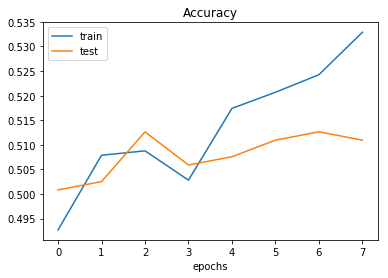

In [606]:
# Accuracy in and out sample
plt.title('Accuracy')
plt.plot(historyLSTM.history['acc'], label='train')
plt.plot(historyLSTM.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [414]:
# save model
my_model = historyLSTM.model.save('my_model4.h5')
# load model
model = load_model('my_model4.h5')
# summarize model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 4)                 720       
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 3         
Total params: 733
Trainable params: 733
Non-trainable params: 0
_________________________________________________________________


In [647]:
#Inserindo camadas:
modelLSTM = Sequential()
modelLSTM.add(LSTM(64,dropout=0.1, recurrent_dropout=0.1))
modelLSTM.add(Dense(8, activation='sigmoid'))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [648]:
#Treinando a rede
historyLSTM = modelLSTM.fit(X_train2, Y_train, epochs=epochs, batch_size=batch_size,validation_split=vs,callbacks=[EarlyStopping(monitor=monitor, patience=patience, min_delta=md)])

Train on 3359 samples, validate on 593 samples
Epoch 1/20


1915/3359 [================>.............] - ETA: 11:04:25 - loss: 0.6542 - acc: 0.800 - ETA: 5:32:00 - loss: 0.6972 - acc: 0.500 - ETA: 3:41:14 - loss: 0.7205 - acc: 0.33 - ETA: 2:45:55 - loss: 0.7247 - acc: 0.30 - ETA: 2:12:41 - loss: 0.7215 - acc: 0.32 - ETA: 1:50:32 - loss: 0.7150 - acc: 0.36 - ETA: 1:34:46 - loss: 0.7176 - acc: 0.34 - ETA: 1:22:55 - loss: 0.7133 - acc: 0.37 - ETA: 1:13:41 - loss: 0.7099 - acc: 0.40 - ETA: 1:06:19 - loss: 0.7049 - acc: 0.44 - ETA: 1:00:16 - loss: 0.7051 - acc: 0.43 - ETA: 55:14 - loss: 0.7051 - acc: 0.4333 - ETA: 50:57 - loss: 0.7035 - acc: 0.44 - ETA: 47:17 - loss: 0.7037 - acc: 0.44 - ETA: 44:07 - loss: 0.7009 - acc: 0.46 - ETA: 41:20 - loss: 0.6998 - acc: 0.47 - ETA: 38:55 - loss: 0.6988 - acc: 0.48 - ETA: 36:44 - loss: 0.6991 - acc: 0.47 - ETA: 34:48 - loss: 0.6984 - acc: 0.48 - ETA: 33:03 - loss: 0.6977 - acc: 0.49 - ETA: 31:28 - loss: 0.6982 - acc: 0.48 - ETA: 30:02 - loss: 0.6956 - acc: 0.50 - ETA: 28:43 - loss: 0.6959 - acc: 0.50 - ETA: 27:

3359/3359 [==============================] - ETA: 53s - loss: 0.6931 - acc: 0.51 - ETA: 52s - loss: 0.6930 - acc: 0.51 - ETA: 51s - loss: 0.6929 - acc: 0.52 - ETA: 50s - loss: 0.6928 - acc: 0.52 - ETA: 49s - loss: 0.6928 - acc: 0.52 - ETA: 48s - loss: 0.6929 - acc: 0.52 - ETA: 47s - loss: 0.6928 - acc: 0.52 - ETA: 46s - loss: 0.6930 - acc: 0.51 - ETA: 45s - loss: 0.6931 - acc: 0.51 - ETA: 44s - loss: 0.6932 - acc: 0.51 - ETA: 44s - loss: 0.6932 - acc: 0.51 - ETA: 43s - loss: 0.6932 - acc: 0.51 - ETA: 43s - loss: 0.6933 - acc: 0.51 - ETA: 42s - loss: 0.6934 - acc: 0.51 - ETA: 41s - loss: 0.6935 - acc: 0.51 - ETA: 40s - loss: 0.6934 - acc: 0.51 - ETA: 39s - loss: 0.6934 - acc: 0.51 - ETA: 38s - loss: 0.6934 - acc: 0.51 - ETA: 37s - loss: 0.6935 - acc: 0.51 - ETA: 36s - loss: 0.6934 - acc: 0.51 - ETA: 36s - loss: 0.6934 - acc: 0.51 - ETA: 35s - loss: 0.6933 - acc: 0.51 - ETA: 35s - loss: 0.6933 - acc: 0.51 - ETA: 34s - loss: 0.6933 - acc: 0.51 - ETA: 34s - loss: 0.6933 - acc: 0.51 - ETA: 

2365/3359 [====================>.........] - ETA: 1:42 - loss: 0.6989 - acc: 0.200 - ETA: 1:10 - loss: 0.6985 - acc: 0.200 - ETA: 1:00 - loss: 0.6894 - acc: 0.400 - ETA: 56s - loss: 0.6914 - acc: 0.400 - ETA: 53s - loss: 0.6921 - acc: 0.40 - ETA: 45s - loss: 0.6926 - acc: 0.45 - ETA: 44s - loss: 0.6936 - acc: 0.42 - ETA: 43s - loss: 0.6940 - acc: 0.42 - ETA: 42s - loss: 0.6939 - acc: 0.44 - ETA: 39s - loss: 0.6920 - acc: 0.46 - ETA: 40s - loss: 0.6911 - acc: 0.49 - ETA: 40s - loss: 0.6916 - acc: 0.50 - ETA: 40s - loss: 0.6911 - acc: 0.52 - ETA: 40s - loss: 0.6914 - acc: 0.50 - ETA: 42s - loss: 0.6911 - acc: 0.50 - ETA: 42s - loss: 0.6911 - acc: 0.51 - ETA: 43s - loss: 0.6918 - acc: 0.50 - ETA: 44s - loss: 0.6917 - acc: 0.50 - ETA: 45s - loss: 0.6912 - acc: 0.51 - ETA: 45s - loss: 0.6914 - acc: 0.50 - ETA: 44s - loss: 0.6915 - acc: 0.49 - ETA: 42s - loss: 0.6924 - acc: 0.48 - ETA: 42s - loss: 0.6921 - acc: 0.47 - ETA: 41s - loss: 0.6914 - acc: 0.47 - ETA: 41s - loss: 0.6914 - acc: 0.46 

3359/3359 [==============================] - ETA: 5s - loss: 0.6925 - acc: 0.508 - ETA: 5s - loss: 0.6925 - acc: 0.509 - ETA: 5s - loss: 0.6924 - acc: 0.509 - ETA: 5s - loss: 0.6924 - acc: 0.509 - ETA: 5s - loss: 0.6924 - acc: 0.510 - ETA: 4s - loss: 0.6923 - acc: 0.511 - ETA: 4s - loss: 0.6922 - acc: 0.511 - ETA: 4s - loss: 0.6922 - acc: 0.511 - ETA: 4s - loss: 0.6922 - acc: 0.512 - ETA: 4s - loss: 0.6922 - acc: 0.513 - ETA: 4s - loss: 0.6922 - acc: 0.512 - ETA: 4s - loss: 0.6922 - acc: 0.512 - ETA: 4s - loss: 0.6923 - acc: 0.511 - ETA: 4s - loss: 0.6922 - acc: 0.512 - ETA: 4s - loss: 0.6921 - acc: 0.513 - ETA: 4s - loss: 0.6922 - acc: 0.512 - ETA: 4s - loss: 0.6922 - acc: 0.512 - ETA: 3s - loss: 0.6922 - acc: 0.511 - ETA: 3s - loss: 0.6923 - acc: 0.510 - ETA: 3s - loss: 0.6922 - acc: 0.511 - ETA: 3s - loss: 0.6922 - acc: 0.511 - ETA: 3s - loss: 0.6922 - acc: 0.511 - ETA: 3s - loss: 0.6921 - acc: 0.513 - ETA: 3s - loss: 0.6921 - acc: 0.513 - ETA: 3s - loss: 0.6921 - acc: 0.513 - ETA: 

2265/3359 [===================>..........] - ETA: 30s - loss: 0.7093 - acc: 0.40 - ETA: 37s - loss: 0.7053 - acc: 0.40 - ETA: 41s - loss: 0.7001 - acc: 0.46 - ETA: 43s - loss: 0.6875 - acc: 0.55 - ETA: 44s - loss: 0.6891 - acc: 0.52 - ETA: 49s - loss: 0.6976 - acc: 0.53 - ETA: 49s - loss: 0.6966 - acc: 0.54 - ETA: 51s - loss: 0.6965 - acc: 0.52 - ETA: 51s - loss: 0.6958 - acc: 0.53 - ETA: 50s - loss: 0.6957 - acc: 0.56 - ETA: 50s - loss: 0.6954 - acc: 0.56 - ETA: 50s - loss: 0.6936 - acc: 0.58 - ETA: 50s - loss: 0.6914 - acc: 0.60 - ETA: 49s - loss: 0.6916 - acc: 0.58 - ETA: 49s - loss: 0.6932 - acc: 0.54 - ETA: 49s - loss: 0.6929 - acc: 0.53 - ETA: 49s - loss: 0.6935 - acc: 0.51 - ETA: 50s - loss: 0.6915 - acc: 0.54 - ETA: 50s - loss: 0.6910 - acc: 0.55 - ETA: 50s - loss: 0.6910 - acc: 0.55 - ETA: 50s - loss: 0.6914 - acc: 0.55 - ETA: 50s - loss: 0.6916 - acc: 0.55 - ETA: 50s - loss: 0.6920 - acc: 0.54 - ETA: 50s - loss: 0.6919 - acc: 0.55 - ETA: 50s - loss: 0.6914 - acc: 0.56 - ETA: 

3359/3359 [==============================] - ETA: 6s - loss: 0.6910 - acc: 0.514 - ETA: 6s - loss: 0.6911 - acc: 0.514 - ETA: 5s - loss: 0.6911 - acc: 0.514 - ETA: 5s - loss: 0.6911 - acc: 0.513 - ETA: 5s - loss: 0.6910 - acc: 0.515 - ETA: 5s - loss: 0.6908 - acc: 0.515 - ETA: 5s - loss: 0.6906 - acc: 0.517 - ETA: 5s - loss: 0.6906 - acc: 0.516 - ETA: 5s - loss: 0.6905 - acc: 0.517 - ETA: 5s - loss: 0.6904 - acc: 0.517 - ETA: 4s - loss: 0.6904 - acc: 0.517 - ETA: 4s - loss: 0.6902 - acc: 0.517 - ETA: 4s - loss: 0.6903 - acc: 0.516 - ETA: 4s - loss: 0.6902 - acc: 0.515 - ETA: 4s - loss: 0.6903 - acc: 0.514 - ETA: 4s - loss: 0.6906 - acc: 0.514 - ETA: 4s - loss: 0.6904 - acc: 0.514 - ETA: 3s - loss: 0.6905 - acc: 0.514 - ETA: 3s - loss: 0.6904 - acc: 0.516 - ETA: 3s - loss: 0.6904 - acc: 0.515 - ETA: 3s - loss: 0.6903 - acc: 0.516 - ETA: 3s - loss: 0.6904 - acc: 0.514 - ETA: 3s - loss: 0.6905 - acc: 0.514 - ETA: 3s - loss: 0.6907 - acc: 0.513 - ETA: 3s - loss: 0.6906 - acc: 0.515 - ETA: 

2470/3359 [=====================>........] - ETA: 30s - loss: 0.6984 - acc: 0.60 - ETA: 38s - loss: 0.7019 - acc: 0.40 - ETA: 45s - loss: 0.6923 - acc: 0.60 - ETA: 48s - loss: 0.6888 - acc: 0.60 - ETA: 56s - loss: 0.7038 - acc: 0.56 - ETA: 56s - loss: 0.7049 - acc: 0.56 - ETA: 57s - loss: 0.7026 - acc: 0.57 - ETA: 59s - loss: 0.7009 - acc: 0.57 - ETA: 59s - loss: 0.7053 - acc: 0.53 - ETA: 57s - loss: 0.7061 - acc: 0.48 - ETA: 56s - loss: 0.7061 - acc: 0.45 - ETA: 55s - loss: 0.7054 - acc: 0.45 - ETA: 55s - loss: 0.7059 - acc: 0.43 - ETA: 54s - loss: 0.7038 - acc: 0.42 - ETA: 53s - loss: 0.7037 - acc: 0.44 - ETA: 52s - loss: 0.7028 - acc: 0.45 - ETA: 51s - loss: 0.7024 - acc: 0.44 - ETA: 48s - loss: 0.7052 - acc: 0.41 - ETA: 46s - loss: 0.7065 - acc: 0.40 - ETA: 45s - loss: 0.7068 - acc: 0.40 - ETA: 45s - loss: 0.7058 - acc: 0.40 - ETA: 43s - loss: 0.7069 - acc: 0.40 - ETA: 43s - loss: 0.7060 - acc: 0.41 - ETA: 43s - loss: 0.7068 - acc: 0.41 - ETA: 43s - loss: 0.7061 - acc: 0.42 - ETA: 

3359/3359 [==============================] - ETA: 4s - loss: 0.6914 - acc: 0.512 - ETA: 4s - loss: 0.6913 - acc: 0.513 - ETA: 4s - loss: 0.6913 - acc: 0.512 - ETA: 4s - loss: 0.6913 - acc: 0.512 - ETA: 4s - loss: 0.6913 - acc: 0.513 - ETA: 4s - loss: 0.6913 - acc: 0.512 - ETA: 3s - loss: 0.6914 - acc: 0.510 - ETA: 3s - loss: 0.6912 - acc: 0.510 - ETA: 3s - loss: 0.6911 - acc: 0.511 - ETA: 3s - loss: 0.6909 - acc: 0.512 - ETA: 3s - loss: 0.6909 - acc: 0.512 - ETA: 3s - loss: 0.6910 - acc: 0.513 - ETA: 3s - loss: 0.6910 - acc: 0.512 - ETA: 3s - loss: 0.6911 - acc: 0.512 - ETA: 3s - loss: 0.6914 - acc: 0.512 - ETA: 2s - loss: 0.6913 - acc: 0.513 - ETA: 2s - loss: 0.6915 - acc: 0.513 - ETA: 2s - loss: 0.6914 - acc: 0.514 - ETA: 2s - loss: 0.6916 - acc: 0.512 - ETA: 2s - loss: 0.6917 - acc: 0.512 - ETA: 2s - loss: 0.6916 - acc: 0.513 - ETA: 2s - loss: 0.6917 - acc: 0.512 - ETA: 2s - loss: 0.6918 - acc: 0.512 - ETA: 2s - loss: 0.6917 - acc: 0.512 - ETA: 2s - loss: 0.6916 - acc: 0.513 - ETA: 

2380/3359 [====================>.........] - ETA: 53s - loss: 0.7159 - acc: 0.40 - ETA: 51s - loss: 0.7059 - acc: 0.40 - ETA: 59s - loss: 0.6927 - acc: 0.46 - ETA: 1:00 - loss: 0.6837 - acc: 0.500 - ETA: 57s - loss: 0.6928 - acc: 0.520 - ETA: 58s - loss: 0.6980 - acc: 0.50 - ETA: 55s - loss: 0.7024 - acc: 0.51 - ETA: 54s - loss: 0.7030 - acc: 0.50 - ETA: 54s - loss: 0.7015 - acc: 0.51 - ETA: 53s - loss: 0.6949 - acc: 0.56 - ETA: 52s - loss: 0.6921 - acc: 0.56 - ETA: 52s - loss: 0.6922 - acc: 0.56 - ETA: 51s - loss: 0.6921 - acc: 0.56 - ETA: 51s - loss: 0.6908 - acc: 0.55 - ETA: 50s - loss: 0.6888 - acc: 0.57 - ETA: 50s - loss: 0.6888 - acc: 0.58 - ETA: 50s - loss: 0.6899 - acc: 0.56 - ETA: 50s - loss: 0.6919 - acc: 0.54 - ETA: 50s - loss: 0.6951 - acc: 0.52 - ETA: 51s - loss: 0.6948 - acc: 0.52 - ETA: 51s - loss: 0.6942 - acc: 0.52 - ETA: 51s - loss: 0.6914 - acc: 0.53 - ETA: 52s - loss: 0.6927 - acc: 0.53 - ETA: 52s - loss: 0.6917 - acc: 0.53 - ETA: 51s - loss: 0.6916 - acc: 0.53 - ET

3359/3359 [==============================] - ETA: 5s - loss: 0.6903 - acc: 0.518 - ETA: 5s - loss: 0.6903 - acc: 0.517 - ETA: 5s - loss: 0.6900 - acc: 0.519 - ETA: 4s - loss: 0.6901 - acc: 0.518 - ETA: 4s - loss: 0.6903 - acc: 0.519 - ETA: 4s - loss: 0.6905 - acc: 0.518 - ETA: 4s - loss: 0.6905 - acc: 0.518 - ETA: 4s - loss: 0.6906 - acc: 0.517 - ETA: 4s - loss: 0.6905 - acc: 0.516 - ETA: 4s - loss: 0.6907 - acc: 0.515 - ETA: 4s - loss: 0.6907 - acc: 0.516 - ETA: 3s - loss: 0.6908 - acc: 0.516 - ETA: 3s - loss: 0.6910 - acc: 0.515 - ETA: 3s - loss: 0.6907 - acc: 0.517 - ETA: 3s - loss: 0.6906 - acc: 0.516 - ETA: 3s - loss: 0.6906 - acc: 0.518 - ETA: 3s - loss: 0.6906 - acc: 0.518 - ETA: 3s - loss: 0.6908 - acc: 0.517 - ETA: 3s - loss: 0.6908 - acc: 0.516 - ETA: 3s - loss: 0.6909 - acc: 0.515 - ETA: 3s - loss: 0.6909 - acc: 0.515 - ETA: 3s - loss: 0.6909 - acc: 0.515 - ETA: 2s - loss: 0.6910 - acc: 0.515 - ETA: 2s - loss: 0.6911 - acc: 0.515 - ETA: 2s - loss: 0.6909 - acc: 0.517 - ETA: 

2050/3359 [=================>............] - ETA: 38s - loss: 0.6919 - acc: 0.60 - ETA: 57s - loss: 0.7009 - acc: 0.60 - ETA: 52s - loss: 0.6989 - acc: 0.60 - ETA: 50s - loss: 0.6945 - acc: 0.55 - ETA: 49s - loss: 0.6938 - acc: 0.56 - ETA: 47s - loss: 0.6977 - acc: 0.56 - ETA: 47s - loss: 0.6922 - acc: 0.54 - ETA: 48s - loss: 0.6894 - acc: 0.57 - ETA: 49s - loss: 0.6924 - acc: 0.57 - ETA: 47s - loss: 0.6901 - acc: 0.58 - ETA: 47s - loss: 0.6911 - acc: 0.54 - ETA: 47s - loss: 0.6912 - acc: 0.53 - ETA: 48s - loss: 0.6883 - acc: 0.55 - ETA: 48s - loss: 0.6891 - acc: 0.54 - ETA: 49s - loss: 0.6955 - acc: 0.52 - ETA: 49s - loss: 0.6936 - acc: 0.52 - ETA: 48s - loss: 0.6934 - acc: 0.52 - ETA: 49s - loss: 0.6957 - acc: 0.51 - ETA: 49s - loss: 0.6967 - acc: 0.51 - ETA: 49s - loss: 0.6946 - acc: 0.53 - ETA: 51s - loss: 0.6927 - acc: 0.54 - ETA: 50s - loss: 0.6928 - acc: 0.53 - ETA: 50s - loss: 0.6928 - acc: 0.53 - ETA: 50s - loss: 0.6929 - acc: 0.53 - ETA: 49s - loss: 0.6912 - acc: 0.54 - ETA: 

3359/3359 [==============================] - ETA: 8s - loss: 0.6887 - acc: 0.526 - ETA: 8s - loss: 0.6888 - acc: 0.526 - ETA: 7s - loss: 0.6889 - acc: 0.528 - ETA: 7s - loss: 0.6890 - acc: 0.527 - ETA: 7s - loss: 0.6891 - acc: 0.528 - ETA: 7s - loss: 0.6891 - acc: 0.527 - ETA: 7s - loss: 0.6892 - acc: 0.526 - ETA: 7s - loss: 0.6891 - acc: 0.525 - ETA: 6s - loss: 0.6892 - acc: 0.525 - ETA: 6s - loss: 0.6891 - acc: 0.524 - ETA: 6s - loss: 0.6891 - acc: 0.524 - ETA: 6s - loss: 0.6889 - acc: 0.526 - ETA: 6s - loss: 0.6890 - acc: 0.525 - ETA: 6s - loss: 0.6888 - acc: 0.527 - ETA: 5s - loss: 0.6889 - acc: 0.526 - ETA: 5s - loss: 0.6888 - acc: 0.528 - ETA: 5s - loss: 0.6888 - acc: 0.528 - ETA: 5s - loss: 0.6887 - acc: 0.529 - ETA: 5s - loss: 0.6888 - acc: 0.527 - ETA: 5s - loss: 0.6887 - acc: 0.528 - ETA: 5s - loss: 0.6888 - acc: 0.527 - ETA: 5s - loss: 0.6891 - acc: 0.527 - ETA: 5s - loss: 0.6891 - acc: 0.526 - ETA: 4s - loss: 0.6890 - acc: 0.526 - ETA: 4s - loss: 0.6888 - acc: 0.526 - ETA: 

3065/3359 [==========================>...] - ETA: 12s - loss: 0.7005 - acc: 0.40 - ETA: 12s - loss: 0.6953 - acc: 0.40 - ETA: 12s - loss: 0.7013 - acc: 0.45 - ETA: 12s - loss: 0.7035 - acc: 0.40 - ETA: 11s - loss: 0.6955 - acc: 0.42 - ETA: 11s - loss: 0.6919 - acc: 0.46 - ETA: 12s - loss: 0.6912 - acc: 0.47 - ETA: 13s - loss: 0.6896 - acc: 0.50 - ETA: 13s - loss: 0.6896 - acc: 0.50 - ETA: 14s - loss: 0.6905 - acc: 0.52 - ETA: 13s - loss: 0.6909 - acc: 0.51 - ETA: 13s - loss: 0.6890 - acc: 0.54 - ETA: 12s - loss: 0.6865 - acc: 0.54 - ETA: 13s - loss: 0.6859 - acc: 0.55 - ETA: 12s - loss: 0.6871 - acc: 0.54 - ETA: 12s - loss: 0.6873 - acc: 0.53 - ETA: 12s - loss: 0.6871 - acc: 0.53 - ETA: 12s - loss: 0.6876 - acc: 0.53 - ETA: 12s - loss: 0.6885 - acc: 0.53 - ETA: 12s - loss: 0.6883 - acc: 0.53 - ETA: 12s - loss: 0.6876 - acc: 0.54 - ETA: 12s - loss: 0.6888 - acc: 0.53 - ETA: 11s - loss: 0.6879 - acc: 0.53 - ETA: 11s - loss: 0.6883 - acc: 0.53 - ETA: 11s - loss: 0.6892 - acc: 0.52 - ETA: 

3359/3359 [==============================] - ETA: 1s - loss: 0.6889 - acc: 0.526 - ETA: 1s - loss: 0.6889 - acc: 0.525 - ETA: 0s - loss: 0.6892 - acc: 0.524 - ETA: 0s - loss: 0.6891 - acc: 0.525 - ETA: 0s - loss: 0.6892 - acc: 0.524 - ETA: 0s - loss: 0.6894 - acc: 0.523 - ETA: 0s - loss: 0.6894 - acc: 0.525 - ETA: 0s - loss: 0.6894 - acc: 0.525 - ETA: 0s - loss: 0.6894 - acc: 0.525 - ETA: 0s - loss: 0.6894 - acc: 0.525 - ETA: 0s - loss: 0.6894 - acc: 0.525 - ETA: 0s - loss: 0.6895 - acc: 0.524 - ETA: 0s - loss: 0.6897 - acc: 0.523 - ETA: 0s - loss: 0.6897 - acc: 0.524 - ETA: 0s - loss: 0.6897 - acc: 0.523 - ETA: 0s - loss: 0.6898 - acc: 0.522 - 13s 4ms/step - loss: 0.6898 - acc: 0.5222 - val_loss: 0.6914 - val_acc: 0.5110
Epoch 8/20


2120/3359 [=================>............] - ETA: 29s - loss: 0.6607 - acc: 0.40 - ETA: 38s - loss: 0.6647 - acc: 0.50 - ETA: 48s - loss: 0.6795 - acc: 0.46 - ETA: 51s - loss: 0.6901 - acc: 0.45 - ETA: 54s - loss: 0.6916 - acc: 0.40 - ETA: 55s - loss: 0.6968 - acc: 0.40 - ETA: 56s - loss: 0.6950 - acc: 0.40 - ETA: 54s - loss: 0.6948 - acc: 0.42 - ETA: 53s - loss: 0.6908 - acc: 0.44 - ETA: 53s - loss: 0.6872 - acc: 0.46 - ETA: 52s - loss: 0.6926 - acc: 0.41 - ETA: 51s - loss: 0.6952 - acc: 0.40 - ETA: 51s - loss: 0.6942 - acc: 0.40 - ETA: 50s - loss: 0.6913 - acc: 0.41 - ETA: 49s - loss: 0.6897 - acc: 0.44 - ETA: 49s - loss: 0.6891 - acc: 0.46 - ETA: 49s - loss: 0.6893 - acc: 0.48 - ETA: 48s - loss: 0.6857 - acc: 0.50 - ETA: 49s - loss: 0.6875 - acc: 0.50 - ETA: 49s - loss: 0.6872 - acc: 0.51 - ETA: 49s - loss: 0.6893 - acc: 0.49 - ETA: 49s - loss: 0.6903 - acc: 0.47 - ETA: 49s - loss: 0.6905 - acc: 0.47 - ETA: 49s - loss: 0.6905 - acc: 0.48 - ETA: 49s - loss: 0.6905 - acc: 0.49 - ETA: 

3359/3359 [==============================] - ETA: 7s - loss: 0.6918 - acc: 0.511 - ETA: 7s - loss: 0.6918 - acc: 0.512 - ETA: 7s - loss: 0.6918 - acc: 0.511 - ETA: 7s - loss: 0.6918 - acc: 0.511 - ETA: 7s - loss: 0.6918 - acc: 0.512 - ETA: 6s - loss: 0.6919 - acc: 0.511 - ETA: 6s - loss: 0.6919 - acc: 0.510 - ETA: 6s - loss: 0.6918 - acc: 0.512 - ETA: 6s - loss: 0.6918 - acc: 0.511 - ETA: 6s - loss: 0.6917 - acc: 0.511 - ETA: 6s - loss: 0.6916 - acc: 0.512 - ETA: 5s - loss: 0.6916 - acc: 0.513 - ETA: 5s - loss: 0.6913 - acc: 0.512 - ETA: 5s - loss: 0.6912 - acc: 0.513 - ETA: 5s - loss: 0.6911 - acc: 0.514 - ETA: 5s - loss: 0.6911 - acc: 0.515 - ETA: 5s - loss: 0.6908 - acc: 0.517 - ETA: 5s - loss: 0.6908 - acc: 0.516 - ETA: 5s - loss: 0.6907 - acc: 0.516 - ETA: 4s - loss: 0.6906 - acc: 0.516 - ETA: 4s - loss: 0.6909 - acc: 0.515 - ETA: 4s - loss: 0.6909 - acc: 0.515 - ETA: 4s - loss: 0.6908 - acc: 0.516 - ETA: 4s - loss: 0.6906 - acc: 0.517 - ETA: 4s - loss: 0.6907 - acc: 0.517 - ETA: 

2055/3359 [=================>............] - ETA: 27s - loss: 0.7231 - acc: 0.20 - ETA: 36s - loss: 0.7010 - acc: 0.40 - ETA: 39s - loss: 0.6924 - acc: 0.53 - ETA: 39s - loss: 0.7008 - acc: 0.55 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.7006 - acc: 0.46 - ETA: 41s - loss: 0.7061 - acc: 0.45 - ETA: 41s - loss: 0.7058 - acc: 0.47 - ETA: 41s - loss: 0.7082 - acc: 0.44 - ETA: 41s - loss: 0.7038 - acc: 0.46 - ETA: 42s - loss: 0.7025 - acc: 0.45 - ETA: 44s - loss: 0.7055 - acc: 0.41 - ETA: 45s - loss: 0.7045 - acc: 0.43 - ETA: 45s - loss: 0.7021 - acc: 0.44 - ETA: 46s - loss: 0.7025 - acc: 0.44 - ETA: 46s - loss: 0.7013 - acc: 0.46 - ETA: 46s - loss: 0.6954 - acc: 0.49 - ETA: 46s - loss: 0.6936 - acc: 0.50 - ETA: 46s - loss: 0.6959 - acc: 0.49 - ETA: 45s - loss: 0.6951 - acc: 0.50 - ETA: 45s - loss: 0.6942 - acc: 0.50 - ETA: 45s - loss: 0.6955 - acc: 0.50 - ETA: 45s - loss: 0.6955 - acc: 0.50 - ETA: 45s - loss: 0.6978 - acc: 0.50 - ETA: 45s - loss: 0.6959 - acc: 0.50 - ETA: 

3359/3359 [==============================] - ETA: 8s - loss: 0.6865 - acc: 0.523 - ETA: 8s - loss: 0.6862 - acc: 0.524 - ETA: 8s - loss: 0.6863 - acc: 0.523 - ETA: 8s - loss: 0.6863 - acc: 0.523 - ETA: 7s - loss: 0.6862 - acc: 0.524 - ETA: 7s - loss: 0.6862 - acc: 0.524 - ETA: 7s - loss: 0.6864 - acc: 0.524 - ETA: 7s - loss: 0.6866 - acc: 0.524 - ETA: 7s - loss: 0.6867 - acc: 0.524 - ETA: 7s - loss: 0.6869 - acc: 0.524 - ETA: 7s - loss: 0.6872 - acc: 0.522 - ETA: 7s - loss: 0.6869 - acc: 0.522 - ETA: 6s - loss: 0.6870 - acc: 0.523 - ETA: 6s - loss: 0.6870 - acc: 0.522 - ETA: 6s - loss: 0.6875 - acc: 0.521 - ETA: 6s - loss: 0.6873 - acc: 0.522 - ETA: 6s - loss: 0.6875 - acc: 0.523 - ETA: 6s - loss: 0.6878 - acc: 0.521 - ETA: 6s - loss: 0.6877 - acc: 0.521 - ETA: 5s - loss: 0.6879 - acc: 0.520 - ETA: 5s - loss: 0.6876 - acc: 0.520 - ETA: 5s - loss: 0.6876 - acc: 0.520 - ETA: 5s - loss: 0.6876 - acc: 0.519 - ETA: 5s - loss: 0.6878 - acc: 0.520 - ETA: 5s - loss: 0.6880 - acc: 0.519 - ETA: 

2235/3359 [==================>...........] - ETA: 30s - loss: 0.6333 - acc: 0.80 - ETA: 39s - loss: 0.6582 - acc: 0.80 - ETA: 52s - loss: 0.6642 - acc: 0.80 - ETA: 56s - loss: 0.6700 - acc: 0.75 - ETA: 59s - loss: 0.6701 - acc: 0.72 - ETA: 1:05 - loss: 0.6706 - acc: 0.733 - ETA: 1:07 - loss: 0.6729 - acc: 0.714 - ETA: 1:05 - loss: 0.6689 - acc: 0.700 - ETA: 1:03 - loss: 0.6663 - acc: 0.733 - ETA: 1:00 - loss: 0.6699 - acc: 0.700 - ETA: 58s - loss: 0.6727 - acc: 0.672 - ETA: 57s - loss: 0.6736 - acc: 0.66 - ETA: 57s - loss: 0.6780 - acc: 0.63 - ETA: 56s - loss: 0.6815 - acc: 0.60 - ETA: 56s - loss: 0.6825 - acc: 0.58 - ETA: 56s - loss: 0.6827 - acc: 0.58 - ETA: 55s - loss: 0.6829 - acc: 0.58 - ETA: 55s - loss: 0.6842 - acc: 0.57 - ETA: 54s - loss: 0.6857 - acc: 0.56 - ETA: 54s - loss: 0.6846 - acc: 0.58 - ETA: 54s - loss: 0.6849 - acc: 0.58 - ETA: 54s - loss: 0.6854 - acc: 0.58 - ETA: 55s - loss: 0.6872 - acc: 0.56 - ETA: 54s - loss: 0.6862 - acc: 0.55 - ETA: 55s - loss: 0.6847 - acc: 0

3359/3359 [==============================] - ETA: 6s - loss: 0.6890 - acc: 0.524 - ETA: 6s - loss: 0.6887 - acc: 0.525 - ETA: 6s - loss: 0.6887 - acc: 0.524 - ETA: 6s - loss: 0.6890 - acc: 0.522 - ETA: 6s - loss: 0.6891 - acc: 0.521 - ETA: 5s - loss: 0.6894 - acc: 0.522 - ETA: 5s - loss: 0.6893 - acc: 0.521 - ETA: 5s - loss: 0.6894 - acc: 0.522 - ETA: 5s - loss: 0.6893 - acc: 0.522 - ETA: 5s - loss: 0.6895 - acc: 0.521 - ETA: 5s - loss: 0.6896 - acc: 0.520 - ETA: 5s - loss: 0.6898 - acc: 0.519 - ETA: 4s - loss: 0.6900 - acc: 0.518 - ETA: 4s - loss: 0.6899 - acc: 0.519 - ETA: 4s - loss: 0.6898 - acc: 0.520 - ETA: 4s - loss: 0.6897 - acc: 0.520 - ETA: 4s - loss: 0.6897 - acc: 0.520 - ETA: 4s - loss: 0.6897 - acc: 0.519 - ETA: 4s - loss: 0.6897 - acc: 0.520 - ETA: 4s - loss: 0.6898 - acc: 0.520 - ETA: 4s - loss: 0.6898 - acc: 0.520 - ETA: 4s - loss: 0.6895 - acc: 0.520 - ETA: 3s - loss: 0.6895 - acc: 0.521 - ETA: 3s - loss: 0.6896 - acc: 0.521 - ETA: 3s - loss: 0.6893 - acc: 0.522 - ETA: 

2195/3359 [==================>...........] - ETA: 35s - loss: 0.7346 - acc: 0.40 - ETA: 42s - loss: 0.6867 - acc: 0.60 - ETA: 45s - loss: 0.6937 - acc: 0.46 - ETA: 46s - loss: 0.6858 - acc: 0.55 - ETA: 45s - loss: 0.6757 - acc: 0.60 - ETA: 44s - loss: 0.6529 - acc: 0.66 - ETA: 44s - loss: 0.6376 - acc: 0.68 - ETA: 43s - loss: 0.6446 - acc: 0.67 - ETA: 44s - loss: 0.6463 - acc: 0.68 - ETA: 44s - loss: 0.6534 - acc: 0.66 - ETA: 45s - loss: 0.6627 - acc: 0.63 - ETA: 46s - loss: 0.6756 - acc: 0.58 - ETA: 49s - loss: 0.6713 - acc: 0.60 - ETA: 51s - loss: 0.6687 - acc: 0.60 - ETA: 52s - loss: 0.6722 - acc: 0.60 - ETA: 52s - loss: 0.6790 - acc: 0.56 - ETA: 53s - loss: 0.6830 - acc: 0.54 - ETA: 53s - loss: 0.6828 - acc: 0.53 - ETA: 53s - loss: 0.6856 - acc: 0.51 - ETA: 52s - loss: 0.6842 - acc: 0.52 - ETA: 52s - loss: 0.6839 - acc: 0.51 - ETA: 51s - loss: 0.6856 - acc: 0.51 - ETA: 51s - loss: 0.6893 - acc: 0.50 - ETA: 51s - loss: 0.6937 - acc: 0.48 - ETA: 50s - loss: 0.6921 - acc: 0.48 - ETA: 

3359/3359 [==============================] - ETA: 6s - loss: 0.6878 - acc: 0.516 - ETA: 6s - loss: 0.6877 - acc: 0.516 - ETA: 6s - loss: 0.6876 - acc: 0.518 - ETA: 6s - loss: 0.6877 - acc: 0.517 - ETA: 6s - loss: 0.6877 - acc: 0.516 - ETA: 6s - loss: 0.6877 - acc: 0.516 - ETA: 6s - loss: 0.6877 - acc: 0.516 - ETA: 6s - loss: 0.6877 - acc: 0.515 - ETA: 6s - loss: 0.6877 - acc: 0.516 - ETA: 5s - loss: 0.6875 - acc: 0.517 - ETA: 5s - loss: 0.6874 - acc: 0.519 - ETA: 5s - loss: 0.6874 - acc: 0.520 - ETA: 5s - loss: 0.6872 - acc: 0.521 - ETA: 5s - loss: 0.6873 - acc: 0.521 - ETA: 5s - loss: 0.6873 - acc: 0.520 - ETA: 5s - loss: 0.6870 - acc: 0.521 - ETA: 5s - loss: 0.6871 - acc: 0.521 - ETA: 4s - loss: 0.6870 - acc: 0.520 - ETA: 4s - loss: 0.6868 - acc: 0.521 - ETA: 4s - loss: 0.6869 - acc: 0.521 - ETA: 4s - loss: 0.6869 - acc: 0.521 - ETA: 4s - loss: 0.6870 - acc: 0.521 - ETA: 4s - loss: 0.6869 - acc: 0.521 - ETA: 4s - loss: 0.6864 - acc: 0.522 - ETA: 4s - loss: 0.6864 - acc: 0.521 - ETA: 

2395/3359 [====================>.........] - ETA: 55s - loss: 0.6913 - acc: 0.60 - ETA: 56s - loss: 0.6740 - acc: 0.70 - ETA: 1:02 - loss: 0.6804 - acc: 0.666 - ETA: 1:03 - loss: 0.6743 - acc: 0.650 - ETA: 1:00 - loss: 0.6573 - acc: 0.680 - ETA: 57s - loss: 0.6629 - acc: 0.666 - ETA: 54s - loss: 0.6545 - acc: 0.68 - ETA: 52s - loss: 0.6577 - acc: 0.67 - ETA: 50s - loss: 0.6720 - acc: 0.60 - ETA: 49s - loss: 0.6719 - acc: 0.62 - ETA: 48s - loss: 0.6725 - acc: 0.61 - ETA: 47s - loss: 0.6746 - acc: 0.61 - ETA: 47s - loss: 0.6827 - acc: 0.60 - ETA: 46s - loss: 0.6787 - acc: 0.60 - ETA: 43s - loss: 0.6785 - acc: 0.60 - ETA: 41s - loss: 0.6834 - acc: 0.57 - ETA: 40s - loss: 0.6846 - acc: 0.57 - ETA: 41s - loss: 0.6816 - acc: 0.57 - ETA: 41s - loss: 0.6797 - acc: 0.57 - ETA: 41s - loss: 0.6805 - acc: 0.56 - ETA: 42s - loss: 0.6881 - acc: 0.55 - ETA: 43s - loss: 0.6946 - acc: 0.53 - ETA: 44s - loss: 0.6999 - acc: 0.51 - ETA: 45s - loss: 0.7021 - acc: 0.50 - ETA: 46s - loss: 0.7010 - acc: 0.50 

3359/3359 [==============================] - ETA: 5s - loss: 0.6909 - acc: 0.506 - ETA: 5s - loss: 0.6908 - acc: 0.505 - ETA: 5s - loss: 0.6907 - acc: 0.505 - ETA: 4s - loss: 0.6906 - acc: 0.505 - ETA: 4s - loss: 0.6907 - acc: 0.504 - ETA: 4s - loss: 0.6904 - acc: 0.504 - ETA: 4s - loss: 0.6902 - acc: 0.505 - ETA: 4s - loss: 0.6903 - acc: 0.504 - ETA: 4s - loss: 0.6902 - acc: 0.505 - ETA: 4s - loss: 0.6901 - acc: 0.504 - ETA: 4s - loss: 0.6899 - acc: 0.505 - ETA: 3s - loss: 0.6900 - acc: 0.505 - ETA: 3s - loss: 0.6898 - acc: 0.507 - ETA: 3s - loss: 0.6897 - acc: 0.507 - ETA: 3s - loss: 0.6898 - acc: 0.507 - ETA: 3s - loss: 0.6896 - acc: 0.507 - ETA: 3s - loss: 0.6895 - acc: 0.507 - ETA: 3s - loss: 0.6897 - acc: 0.507 - ETA: 3s - loss: 0.6898 - acc: 0.506 - ETA: 3s - loss: 0.6898 - acc: 0.506 - ETA: 3s - loss: 0.6901 - acc: 0.506 - ETA: 3s - loss: 0.6899 - acc: 0.507 - ETA: 2s - loss: 0.6899 - acc: 0.507 - ETA: 2s - loss: 0.6899 - acc: 0.507 - ETA: 2s - loss: 0.6898 - acc: 0.506 - ETA: 

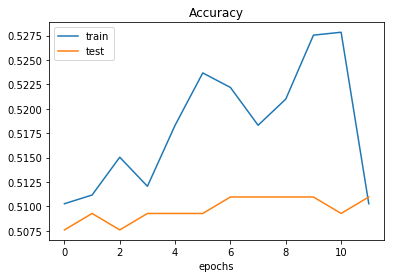

In [649]:
# Accuracy in and out sample
plt.title('Accuracy')
plt.plot(historyLSTM.history['acc'], label='train')
plt.plot(historyLSTM.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [650]:
model = historyLSTM.model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 64)                26880     
_________________________________________________________________
dense_161 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 9         
Total params: 27,409
Trainable params: 27,409
Non-trainable params: 0
_________________________________________________________________


In [621]:
# save model
my_model = historyLSTM.model.save('my_model5.h5')
# load model
model = load_model('my_model5.h5')
# summarize model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 64)                26880     
_________________________________________________________________
dense_141 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 9         
Total params: 27,409
Trainable params: 27,409
Non-trainable params: 0
_________________________________________________________________


In [714]:
pred_train = model.predict(X_train2)
err = 0

In [715]:
for j in range(len(pred_train)):    
    if (pred_train[j][0] - Y_train[j])**2>0.25:
        #print(pred_train[j][0].round(0), Y_train[j])
        err += 1
print('erros:', err, '   partidas:', int(len(pred_train)))
print('train accuracy:',1-err/len(pred_train))

erros: 1871    partidas: 3952
train accuracy: 0.5265688259109311


In [716]:
pred_test = model.predict(X_test2)
err = 0

In [717]:
for j in range(int(len(pred_test))):         
    if (pred_test[j][0] - Y_test[j])**2>0.25:
        #print(pred_test[j][0].round(0), Y_test[j])
        err += 1        
print('erros:', err, '   partidas:', int(len(pred_test)))
print('test accuracy:',1-err/int(len(pred_test)))

erros: 452    partidas: 988
test accuracy: 0.5425101214574899


In [651]:
pred_base = model.predict(Xv)
err = 0
acertou = []

In [652]:
for j in range(int(len(pred_base))):         
    if (pred_base[j][0] - Y[j])**2>0.25:
        #print(pred_base[j][0].round(0), Y[j])
        err += 1
        acertou.append(0)
    else:
        acertou.append(1)
print('erros:', err, '   partidas:', int(len(pred_base)))
print('total accuracy:',1-err/int(len(pred_base)))

erros: 2323    partidas: 4940
total accuracy: 0.5297570850202429


In [679]:
df2 = df.assign(model_prediction = pred_base)

In [680]:
df2['resultado_0-1'] = resultado01
df2['correto'] = acertou
df2['resultado'] = resultado
df2

,Unnamed: 0,Unnamed: 0.1,ano,date,round,home_team,away_team,placar_casa,placar_visitante,resultado,...,mgs6,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3,model_prediction,resultado_0-1,correto
0,0,380,2007,13/05/2007,1,Flamengo,Palmeiras,2.0,4.0,1.0,...,0.409091,0.357143,0.250000,0.523810,0.619048,0.416667,0.571429,0.503839,1.0,1
1,1,381,2007,13/05/2007,1,Atlético-MG,Náutico,2.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.503839,0.0,0
2,2,382,2007,13/05/2007,1,Internacional,Botafogo,2.0,3.0,1.0,...,0.272727,0.285714,0.333333,0.285714,0.523810,0.166667,0.571429,0.440826,1.0,0
3,3,383,2007,13/05/2007,1,Paraná,Grêmio,3.0,0.0,0.0,...,0.272727,0.357143,0.166667,0.523810,0.285714,0.416667,0.285714,0.503839,0.0,0
4,4,384,2007,12/05/2007,1,Figueirense,Athletico-PR,3.0,6.0,1.0,...,0.181818,0.071429,0.000000,0.285714,0.571429,0.166667,0.214286,0.503839,1.0,1
5,5,385,2007,12/05/2007,1,Fluminense,Cruzeiro,2.0,2.0,0.5,...,0.227273,0.142857,0.083333,0.333333,0.476190,0.083333,0.500000,0.440826,1.0,0
6,6,386,2007,12/05/2007,1,São Paulo,Goiás,2.0,0.0,0.0,...,0.045455,0.428571,0.083333,0.571429,0.285714,0.750000,0.214286,0.503839,0.0,0
7,7,387,2007,13/05/2007,1,América-RN,Vasco,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.333333,0.238095,0.166667,0.142857,0.503839,1.0,1
8,8,388,2007,13/05/2007,1,Corinthians,Juventude,1.0,0.0,0.0,...,0.227273,0.500000,0.333333,0.476190,0.619048,0.333333,0.500000,0.503839,0.0,0
9,9,389,2007,13/05/2007,1,Sport,Santos,4.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.285714,0.190476,0.166667,0.142857,0.450067,0.0,1


In [655]:
df2['resultado_0-1'].value_counts()

0.0    2476
1.0    2464
Name: resultado_0-1, dtype: int64

In [656]:
df2['correto'].value_counts()

1    2617
0    2323
Name: correto, dtype: int64

In [660]:
df2.sort_values(by='model_prediction').head(30)

,Unnamed: 0,Unnamed: 0.1,ano,date,round,home_team,away_team,placar_casa,placar_visitante,resultado,...,mgs6,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3,model_prediction,resultado_0-1,correto
379,379,759,2007,02/12/2007,38,Cruzeiro,América-RN,2.0,0.0,0.0,...,0.409091,0.428571,0.333333,0.047619,0.666667,0.000000,0.642857,0.246489,0.0,1
4451,4451,4831,2018,30/12/2018,28,Fluminense,Paraná,4.0,0.0,0.0,...,0.272727,0.071429,0.083333,0.095238,0.476190,0.000000,0.428571,0.253006,0.0,1
4421,4421,4801,2018,30/12/2018,25,Grêmio,Paraná,2.0,0.0,0.0,...,0.181818,0.642857,0.083333,0.095238,0.333333,0.000000,0.214286,0.253006,0.0,1
4481,4481,4861,2018,30/12/2018,31,Cruzeiro,Paraná,3.0,1.0,0.0,...,0.363636,0.357143,0.250000,0.047619,0.761905,0.000000,0.642857,0.253006,0.0,1
4320,4320,4700,2018,30/12/2018,15,Atlético-MG,Paraná,2.0,0.0,0.0,...,0.545455,0.714286,0.500000,0.238095,0.238095,0.000000,0.285714,0.253006,0.0,1
4501,4501,4881,2018,30/12/2018,33,América-MG,Paraná,0.0,1.0,1.0,...,0.363636,0.142857,0.250000,0.142857,0.714286,0.083333,0.642857,0.253006,1.0,0
4338,4338,4718,2018,30/12/2018,16,Palmeiras,Paraná,3.0,0.0,0.0,...,0.318182,0.500000,0.333333,0.142857,0.285714,0.000000,0.357143,0.253006,0.0,1
4391,4391,4771,2018,30/12/2018,22,Sport,Paraná,1.0,0.0,0.0,...,0.681818,0.142857,0.500000,0.095238,0.380952,0.000000,0.357143,0.253006,0.0,1
4381,4381,4761,2018,30/12/2018,21,Corinthians,Paraná,1.0,0.0,0.0,...,0.227273,0.142857,0.083333,0.095238,0.428571,0.000000,0.428571,0.253006,0.0,1
4461,4461,4841,2018,30/12/2018,29,Bahia,Paraná,2.0,0.0,0.0,...,0.272727,0.214286,0.083333,0.095238,0.619048,0.000000,0.642857,0.253006,0.0,1


In [661]:
df2.sort_values(by='model_prediction').tail(30)

,Unnamed: 0,Unnamed: 0.1,ano,date,round,home_team,away_team,placar_casa,placar_visitante,resultado,...,mgs6,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3,model_prediction,resultado_0-1,correto
1992,1992,2372,2012,20/07/2012,10,Atlético-GO,Figueirense,3.0,2.0,0.0,...,0.636364,0.071429,0.500000,0.285714,0.476190,0.166667,0.357143,0.701808,0.0,0
4528,4528,4908,2018,30/12/2018,35,Paraná,Palmeiras,1.0,1.0,0.5,...,0.500000,0.071429,0.500000,0.571429,0.238095,0.333333,0.142857,0.703545,1.0,1
4444,4444,4824,2018,30/12/2018,27,Paraná,Vasco,1.0,1.0,0.5,...,0.454545,0.142857,0.333333,0.333333,0.428571,0.083333,0.214286,0.703545,1.0,1
4493,4493,4873,2018,30/12/2018,32,Paraná,Vitória,1.0,1.0,0.5,...,0.772727,0.071429,0.583333,0.333333,0.476190,0.166667,0.285714,0.703545,1.0,1
4559,4559,4939,2018,30/12/2018,38,Paraná,Internacional,1.0,1.0,0.5,...,0.272727,0.142857,0.250000,0.380952,0.238095,0.166667,0.214286,0.703545,1.0,1
4180,4180,4560,2018,15/04/2018,1,América-MG,Sport,3.0,0.0,0.0,...,0.363636,0.214286,0.250000,0.285714,0.476190,0.250000,0.571429,0.703545,0.0,0
4475,4475,4855,2018,30/12/2018,30,Paraná,Flamengo,0.0,4.0,1.0,...,0.636364,0.142857,0.333333,0.523810,0.095238,0.333333,0.071429,0.703545,1.0,1
4402,4402,4782,2018,30/12/2018,23,Paraná,Chapecoense,1.0,1.0,0.5,...,0.272727,0.142857,0.250000,0.333333,0.476190,0.166667,0.428571,0.703545,1.0,1
4915,4915,5295,2019,01/12/2019,36,Palmeiras,Flamengo,1.0,3.0,1.0,...,0.272727,0.214286,0.250000,0.809524,0.333333,0.333333,0.142857,0.705546,1.0,1
1438,1438,1818,2010,17/10/2010,30,Fluminense,Botafogo,0.0,0.0,0.5,...,0.318182,0.428571,0.333333,0.285714,0.285714,0.333333,0.285714,0.726471,1.0,1


In [723]:
print(len(df2.sort_values(by='model_prediction').head(20)[df2.correto==1])*5,'% de acerto entre as 20 "menores previsões"')
print(len(df2.sort_values(by='model_prediction').head(100)[df2.correto==1]),'% de acerto entre as 100 "menores previsões"')
print(len(df2.sort_values(by='model_prediction').tail(20)[df2.correto==1])*5,'% de acerto entre as 20 "maiores previsões"')
print(len(df2.sort_values(by='model_prediction').tail(100)[df2.correto==1]),'% de acerto entre as 100 "maiores previsões"')

C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


90 % de acerto entre as 20 "menores previsões"


C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


69 % de acerto entre as 100 "menores previsões"


C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


70 % de acerto entre as 20 "maiores previsões"


C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


73 % de acerto entre as 100 "maiores previsões"


In [705]:
df3 = pd.read_csv('PrevisoesEemN.csv',sep=';',encoding='Latin-1')
df3

,Unnamed: 0,time mandante,placar mandante,placar visitante,time visitante,rodada,lambda mandante,lambda visitante,erro média mandante,erro média visitante,erro moda mandante,erro moda visitante,frequência do erro,probabilidade placar,probabilidade máxima,nota do ranqueamento,partida,resultado,previsão,correto2
0,0,Santos,0,3,Grêmio,20,"1,61","1,3406","1,61","-1,659",1,-2,4,"0,02100473","0,112900481",0,1,1,1,1
1,1,Avaí,1,0,Atlético-MG,20,"0,527","1,1625","-0,473","1,163",-1,1,4,"0,097290422","0,214611225",6,2,0,1,0
2,2,CSA,1,0,Ceará,20,"0,5464","0,8427","-0,454","0,843",-1,0,20,"0,136217287","0,249299573",8,3,0,1,0
3,3,Fortaleza,0,1,Palmeiras,20,"0,7836","1,3884","0,784","0,388",0,0,24,"0,158207472","0,158207472",10,4,1,1,1
4,4,Botafogo,1,2,São Paulo,20,"0,6001","0,4343","-0,4","-1,566",-1,-2,7,"0,020115882","0,355439581",3,5,1,1,1
5,5,Cruzeiro,1,2,Flamengo,20,"0,6648","2,0053","-0,335","0,005",-1,0,20,"0,092557161","0,139225574",7,6,1,1,1
6,6,Goiás,3,0,Fluminense,20,"1,7994","1,0813","-1,201","1,081",-2,1,4,"0,054470302","0,109144487",2,7,0,0,1
7,7,Internacional,1,0,Chapecoense,20,"3,9078","0,6673","2,908","0,667",2,0,5,"0,040270929","0,10249556",1,8,0,0,1
8,8,Corinthians,2,1,Bahia,20,"0,7138","0,5839","-1,286","-0,416",-2,-1,12,"0,040632881","0,273159338",4,9,0,1,0
9,9,Vasco,1,1,Athlético-PR,20,"1,1788","2,0185","0,179","1,018",0,1,8,"0,097252133","0,098151715",9,10,1,1,1


In [706]:
correto2 = list(df3.correto2)
correto3 = [0]*len(resultado)


In [707]:
for i in range(len(correto2)):
    correto3[i+len(resultado)-len(correto2)] = correto2[i]
    
df4 = df2.assign(correto2 = correto3)
df4.tail(190)

,Unnamed: 0,Unnamed: 0.1,ano,date,round,home_team,away_team,placar_casa,placar_visitante,resultado,...,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3,model_prediction,resultado_0-1,correto,correto2
4750,4750,5130,2019,21/09/2019,20,Santos,Grêmio,0.0,3.0,1.0,...,0.714286,0.416667,0.523810,0.285714,0.416667,0.285714,0.503839,1.0,1,1
4751,4751,5131,2019,23/09/2019,20,Avaí,Atlético-MG,1.0,0.0,0.0,...,0.214286,0.500000,0.190476,0.428571,0.083333,0.285714,0.440826,0.0,1,0
4752,4752,5132,2019,22/09/2019,20,CSA,Ceará,1.0,0.0,0.0,...,0.214286,0.250000,0.285714,0.380952,0.166667,0.285714,0.503839,0.0,0,0
4753,4753,5133,2019,22/09/2019,20,Fortaleza,Palmeiras,0.0,1.0,1.0,...,0.142857,0.166667,0.428571,0.333333,0.250000,0.357143,0.503839,1.0,1,1
4754,4754,5134,2019,21/09/2019,20,Botafogo,São Paulo,1.0,2.0,1.0,...,0.285714,0.166667,0.238095,0.285714,0.083333,0.214286,0.527374,1.0,1,1
4755,4755,5135,2019,21/09/2019,20,Cruzeiro,Flamengo,1.0,2.0,1.0,...,0.285714,0.333333,0.809524,0.095238,0.833333,0.071429,0.671822,1.0,1,1
4756,4756,5136,2019,22/09/2019,20,Goiás,Fluminense,3.0,0.0,0.0,...,0.214286,0.333333,0.142857,0.333333,0.166667,0.357143,0.503839,0.0,0,1
4757,4757,5137,2019,22/09/2019,20,Internacional,Chapecoense,1.0,0.0,0.0,...,0.285714,0.166667,0.142857,0.428571,0.083333,0.428571,0.503839,0.0,0,1
4758,4758,5138,2019,21/09/2019,20,Corinthians,Bahia,2.0,1.0,0.0,...,0.357143,0.166667,0.380952,0.190476,0.416667,0.142857,0.503839,0.0,0,0
4759,4759,5139,2019,22/09/2019,20,Vasco,Athletico-PR,1.0,1.0,0.5,...,0.214286,0.500000,0.238095,0.285714,0.250000,0.357143,0.503839,1.0,1,1


In [724]:
print('O modelo RNN-LSTM teve', round(len(df4[df4.ano==2019][df4['round']>19][df4.correto==1])/190*100,2),'% de acerto nas partidas do returno de 2019.')
print('O modelo do Esporte em Números teve', round(len(df4[df4.ano==2019][df4['round']>19][df4.correto2==1])/190*100,2),'% de acerto nas mesmas partidas.')

C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


O modelo RNN-LSTM teve 57.37 % de acerto nas partidas do returno de 2019.


C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


O modelo do Esporte em Números teve 63.68 % de acerto nas mesmas partidas.


In [725]:
print('Os dois modelos concordaram em', len(df4[df4.ano==2019][df4['round']>19][df4['correto']==df4['correto2']]), 'partidas e discordaram nas outras', len(df4[df4.ano==2019][df4['round']>19][df4['correto']!=df4['correto2']]))
print('Dessas 64, o modelo RNN-LSTM acertou 26 e o do Esporte em Números 38.')

C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Os dois modelos concordaram em 126 partidas e discordaram nas outras 64
Dessas 64, o modelo RNN-LSTM acertou 26 e o do Esporte em Números 38.


In [712]:
df4[df4.ano==2019][df4['round']>19][df4['correto']!=df4['correto2']]

C:\Users\Flavio Fontanella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Unnamed: 0.1,ano,date,round,home_team,away_team,placar_casa,placar_visitante,resultado,...,mgmc3,mgsc3,vgm6,vgs6,vgmf3,vgsf3,model_prediction,resultado_0-1,correto,correto2
4751,4751,5131,2019,23/09/2019,20,Avaí,Atlético-MG,1.0,0.0,0.0,...,0.214286,0.500000,0.190476,0.428571,0.083333,0.285714,0.440826,0.0,1,0
4756,4756,5136,2019,22/09/2019,20,Goiás,Fluminense,3.0,0.0,0.0,...,0.214286,0.333333,0.142857,0.333333,0.166667,0.357143,0.503839,0.0,0,1
4757,4757,5137,2019,22/09/2019,20,Internacional,Chapecoense,1.0,0.0,0.0,...,0.285714,0.166667,0.142857,0.428571,0.083333,0.428571,0.503839,0.0,0,1
4761,4761,5141,2019,25/09/2019,21,Ceará,Cruzeiro,0.0,0.0,0.5,...,0.285714,0.333333,0.285714,0.380952,0.250000,0.285714,0.503839,1.0,1,0
4762,4762,5142,2019,26/09/2019,21,Athletico-PR,Fortaleza,4.0,1.0,0.0,...,0.142857,0.083333,0.285714,0.333333,0.500000,0.285714,0.503839,0.0,0,1
4766,4766,5146,2019,25/09/2019,21,Bahia,Botafogo,2.0,0.0,0.0,...,0.214286,0.166667,0.238095,0.380952,0.166667,0.357143,0.503839,0.0,0,1
4767,4767,5147,2019,26/09/2019,21,Grêmio,Avaí,6.0,1.0,0.0,...,0.428571,0.166667,0.190476,0.238095,0.166667,0.071429,0.503839,0.0,0,1
4771,4771,5151,2019,30/09/2019,22,Goiás,Cruzeiro,1.0,0.0,0.0,...,0.428571,0.250000,0.190476,0.380952,0.083333,0.142857,0.503839,0.0,0,1
4772,4772,5152,2019,29/09/2019,22,Atlético-MG,Ceará,2.0,1.0,0.0,...,0.142857,0.500000,0.095238,0.333333,0.166667,0.285714,0.701808,0.0,0,1
4775,4775,5155,2019,29/09/2019,22,Corinthians,Vasco,1.0,0.0,0.0,...,0.357143,0.250000,0.333333,0.285714,0.333333,0.214286,0.503839,0.0,0,1


In [713]:
df4.to_csv('Base_brasileirao_predict2.csv',sep=';',encoding='Latin-1')